# IMDb Sentiment Analysis

IMDB.avif

# 1 - Introducción

## 1.1 - Contexto del problema

El crecimiento de plataformas digitales ha generado una gran cantidad de contenido textual producido por los usuarios, como reseñas, comentarios y opiniones. En particular, las reseñas de películas publicadas en plataformas como IMDb constituyen una fuente valiosa de información sobre la percepción y satisfacción de los usuarios.

Sin embargo, el análisis manual de grandes volúmenes de texto resulta inviable, lo que motiva el uso de técnicas de Procesamiento del Lenguaje Natural (NLP) y Aprendizaje Automático para extraer información relevante de manera automática.

Es importante destacar que el foco principal de este trabajo no está en maximizar la métrica predictiva, sino en realizar un **análisis comparativo entre distintos enfoques de modelado** aplicados al análisis de sentimiento. A lo largo del proyecto se prioriza la consistencia metodológica, la interpretabilidad de los resultados y la evaluación crítica de la complejidad de cada modelo, por sobre la optimización exhaustiva del desempeño.


## 1.2 - Problema a resolver

El problema abordado en este proyecto consiste en clasificar automáticamente el sentimiento expresado en reseñas de películas como positivo o negativo, a partir del contenido textual de las mismas.

Este problema se formula como una tarea de clasificación binaria supervisada, donde el modelo debe aprender patrones lingüísticos que permitan inferir el sentimiento asociado a cada reseña.

## 1.3 - Objetivo general

Desarrollar y evaluar modelos de Machine Learning y Deep Learning capaces de predecir el sentimiento (positivo o negativo) de reseñas de películas del dataset IMDb, utilizando técnicas de procesamiento de texto.

## 1.4 - Objetivos específicos

* Analizar exploratoriamente el dataset de reseñas de IMDb.

* Aplicar técnicas de preprocesamiento de texto utilizando NLP.

* Comparar distintos métodos de vectorización del texto.

* Entrenar modelos clásicos de Machine Learning para clasificación de sentimiento.

* Implementar modelos de Deep Learning con Keras, utilizando embeddings y redes neuronales.

Evaluar y comparar el desempeño de los distintos enfoques.

## 1.5 - Enfoque metodológico

El proyecto sigue un pipeline típico de Ciencia de Datos aplicado a texto, que incluye:

1. Análisis exploratorio de los datos.

2. Preprocesamiento lingüístico del texto.

3. Vectorización del contenido textual.

4. Entrenamiento de modelos de Machine Learning.

5. Implementación de modelos de Deep Learning.

6. Evaluación y análisis de resultados.

El proyecto pone el foco en comparar el impacto de distintas representaciones del texto sobre el rendimiento de los modelos, avanzando desde métodos basados en conteo hasta embeddings entrenados y redes neuronales.

# 2 – Descripción del Dataset

## 2.1 - Contexto del dataset

Para este proyecto se utiliza el dataset de reseñas de películas IMDB, el cual contiene opiniones escritas por usuarios sobre películas, junto con una etiqueta que indica si el sentimiento expresado es positivo o negativo. Este tipo de datos resulta especialmente adecuado para:

* clasificación supervisada de texto,
* evaluación de técnicas de preprocesamiento NLP,
* comparación entre modelos tradicionales de Machine Learning y modelos de Deep Learning.

El dataset se obtiene desde Kaggle, en formato CSV, lo que permite un mayor control del pipeline de carga, exploración y preprocesamiento, alineándose con los objetivos académicos del curso.

## 2.2 - Origen y justificación de uso

Fuente: [Kaggle – IMDB Dataset of 50K Movie Reviews](https://www.kaggle.com/datasets/lakshmi25npathi/imdb-dataset-of-50k-movie-reviews/data)

Este dataset fue seleccionado porque:

* presenta un problema bien definido de clasificación binaria,
* contiene un volumen suficiente de datos para entrenar modelos de Deep Learning,

## 2.3 - Estructura del dataset

El dataset está compuesto por 50.000 registros, balanceados entre clases, y contiene las siguientes columnas:

| Columna     | Descripción                                                            |
| ----------- | ---------------------------------------------------------------------- |
| `review`    | Texto completo de la reseña escrita por el usuario                     |
| `sentiment` | Etiqueta de sentimiento asociada a la reseña (`positive` / `negative`) |


## Observación importante:
Aunque el dataset contiene únicamente dos columnas, esto es totalmente suficiente para el objetivo del proyecto, ya que:

* la variable `review` constituye la fuente principal de features (texto),
* la variable `sentiment` es la variable objetivo (target),
* el valor analítico surge del procesamiento del texto, no de columnas adicionales.

## 2.4 - Variable objetivo

La variable objetivo es binaria, definida de la siguiente forma:

* `positive` → sentimiento positivo (1)

* `negative` → sentimiento negativo (0)

Esta definición permite:

* aplicar métricas clásicas de clasificación (accuracy, precision, recall, F1-score),

* entrenar modelos supervisados de Machine Learning,

* escalar posteriormente a modelos de Deep Learning con Keras.

## 2.5 - Consideraciones iniciales sobre el texto

Las reseñas presentan características típicas de texto generado por usuarios:

* longitudes variables,
* uso de negaciones (“not good”, “never again”),
* expresiones emocionales fuertes,
* puntuación con carga semántica,
* posibles errores gramaticales.

Estas particularidades justifican la aplicación de un pipeline completo de NLP, incluyendo:

* limpieza y normalización,
* tokenización,
* eliminación de stopwords,
* lematización / stemming,
* análisis exploratorio del texto,
* vectorización y embeddings.

## 2.6 - Idioma del dataset

Las reseñas se encuentran mayoritariamente en inglés, lo cual resulta coherente con:

* el origen de la plataforma IMDB,
* el uso de embeddings preentrenados en inglés,
* la compatibilidad directa con Keras y TensorFlow.

El informe y la explicación del proyecto se presentan en español, mientras que el procesamiento del texto se realiza en inglés.

# 3 – Análisis Exploratorio del Texto (EDA NLP)

Antes de aplicar técnicas de preprocesamiento y modelado, resulta fundamental analizar las características generales del texto contenido en las reseñas.

Este análisis exploratorio permite comprender la estructura del corpus, identificar posibles desafíos lingüísticos y anticipar decisiones de preprocesamiento.

## 3.1 - Descarga del dataset IMDB desde Kaggle

In [ ]:
# =======================================
# 3.1.a Descarga del dataset IMDB desde Kaggle
# =======================================

import kagglehub
import pandas as pd
import os

# Descargar dataset IMDB
path = kagglehub.dataset_download(
    "lakshmi25npathi/imdb-dataset-of-50k-movie-reviews"
)

print("Dataset descargado en:", path)

# Listar archivos descargados
os.listdir(path)


100%|██████████| 25.7M/25.7M [00:01<00:00, 14.9MB/s]

Extracting files...


Dataset descargado en: /root/.cache/kagglehub/datasets/lakshmi25npathi/imdb-dataset-of-50k-movie-reviews/versions/1


['IMDB Dataset.csv']

In [ ]:
# =======================================
# 3.1.b. Lectura del dataset y revisión inicial
# =======================================

DATA_PATH = os.path.join(path, "IMDB Dataset.csv")

df = pd.read_csv(DATA_PATH)

print("Shape:", df.shape)
display(df.head(3))
print("\nColumnas:", df.columns.tolist())
print("\nValores nulos por columna:\n", df.isna().sum())
print("\nDuplicados:", df.duplicated().sum())


Shape: (50000, 2)


,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive



Columnas: ['review', 'sentiment']

Valores nulos por columna:
 review       0
sentiment    0
dtype: int64

Duplicados: 418


## 3.2 - Distribución de clases (sentiment)

Verificar el balance entre reseñas positivas y negativas antes de cualquier modelado.

sentiment
positive    25000
negative    25000
Name: count, dtype: int64


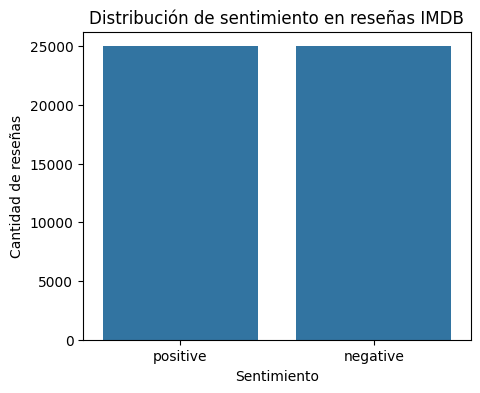

In [ ]:
# =======================================
# 3.2 Distribución de clases
# =======================================

import matplotlib.pyplot as plt
import seaborn as sns

# Conteo de clases
sentiment_counts = df["sentiment"].value_counts()

print(sentiment_counts)

# Visualización
plt.figure(figsize=(5, 4))
sns.countplot(data=df, x="sentiment")
plt.title("Distribución de sentimiento en reseñas IMDB")
plt.xlabel("Sentimiento")
plt.ylabel("Cantidad de reseñas")
plt.show()


**Conclusión – Distribución de clases**

El dataset presenta una distribución perfectamente balanceada entre reseñas con sentimiento positivo y negativo, con una cantidad equivalente de observaciones en cada clase.

Esta característica resulta especialmente favorable para el entrenamiento de modelos de clasificación, ya que reduce el riesgo de sesgos asociados al desbalance de clases y permite evaluar el desempeño de los modelos sin la necesidad de aplicar técnicas adicionales de reponderación o sobremuestreo.

La distribución equilibrada del sentimiento asegura que las métricas de evaluación reflejen de manera fiel la capacidad predictiva de los modelos, tanto en enfoques tradicionales de Machine Learning como en arquitecturas de Deep Learning basadas en redes neuronales.

## 3.3 - Longitud de las reseñas

Objetivo

Analizar la longitud de las reseñas para:

* entender la variabilidad del texto,
* justificar decisiones posteriores (truncado, padding),
* preparar el terreno para Deep Learning con secuencias.

En esta etapa no se preprocesa texto, solo se mide.

Métricas que se calculan:

* Longitud en caracteres
* Longitud en palabras

In [ ]:
# =======================================
# 3.3 Longitud de las reseñas
# =======================================

# Longitud en caracteres
df["review_len_chars"] = df["review"].apply(len)

# Longitud en palabras
df["review_len_words"] = df["review"].apply(lambda x: len(x.split()))

# Resumen estadístico
df[["review_len_chars", "review_len_words"]].describe()


,review_len_chars,review_len_words
count,50000.000000,50000.000000
mean,1309.431020,231.156940
std,989.728014,171.343997
min,32.000000,4.000000
25%,699.000000,126.000000
50%,970.000000,173.000000
75%,1590.250000,280.000000
max,13704.000000,2470.000000


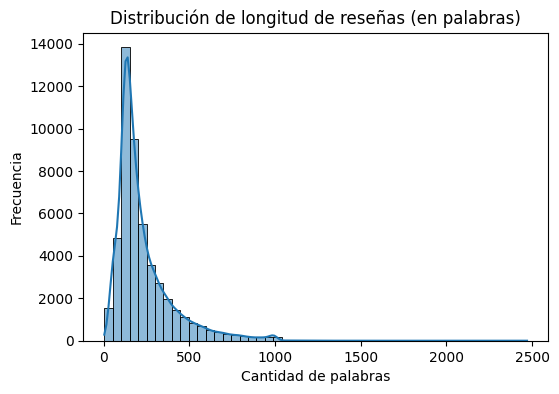

In [ ]:
# Distribución de longitud en palabras
plt.figure(figsize=(6, 4))
sns.histplot(df["review_len_words"], bins=50, kde=True)
plt.title("Distribución de longitud de reseñas (en palabras)")
plt.xlabel("Cantidad de palabras")
plt.ylabel("Frecuencia")
plt.show()

Las reseñas presentan una alta variabilidad en su longitud, tanto en número de palabras como de caracteres. Se observan comentarios breves con opiniones concisas, así como reseñas extensas con descripciones detalladas y argumentativas.

Esta dispersión en la longitud del texto se evidencia tanto en los estadísticos descriptivos como en la distribución observada gráficamente, donde una gran proporción de las reseñas se concentra en un rango medio, mientras que un conjunto reducido alcanza longitudes considerablemente mayores.

Esta característica del corpus sugiere la necesidad de:

* normalizar la longitud de las secuencias para su uso en modelos de Deep Learning,
* definir una longitud máxima de entrada,
* aplicar técnicas de padding o truncamiento durante la vectorización del texto.

## 3.4 - Frecuencia de palabras (análisis léxico inicial)

Objetivo:

Identificar los términos más frecuentes del corpus antes del preprocesamiento, para:

* evidenciar la presencia de stopwords,
* detectar palabras con carga semántica relevante,
* justificar decisiones posteriores de limpieza y normalización.

En esta etapa:

* no se eliminan stopwords,
* no se lematiza,
* no se transforma el texto.

In [ ]:
# =======================================
# 3.4 Frecuencia de palabras
# =======================================

from collections import Counter
import re

# Unir todas las reseñas en un solo texto
all_text = " ".join(df["review"].str.lower())

# Tokenización simple (solo letras)
tokens = re.findall(r"\b[a-z]{2,}\b", all_text)

# Conteo de palabras
word_freq = Counter(tokens)

# Palabras más frecuentes
word_freq.most_common(20)


[('the', 667993),
 ('and', 324441),
 ('of', 289410),
 ('to', 268124),
 ('is', 211082),
 ('br', 201951),
 ('it', 190857),
 ('in', 186781),
 ('this', 151002),
 ('that', 143879),
 ('was', 95608),
 ('as', 91750),
 ('movie', 87971),
 ('for', 87471),
 ('with', 87368),
 ('but', 83554),
 ('film', 79705),
 ('you', 69129),
 ('on', 68057),
 ('not', 60748)]

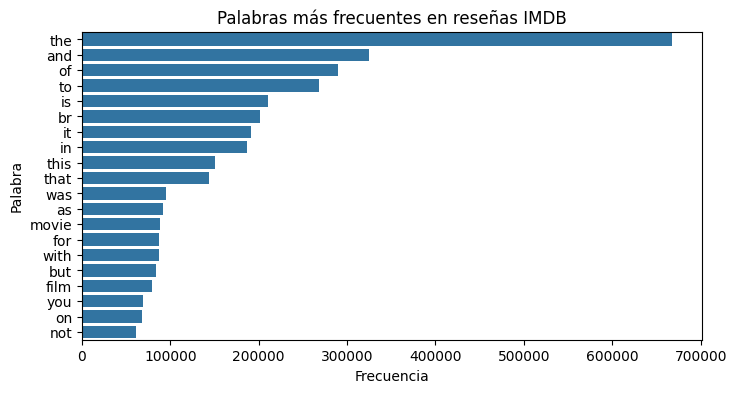

In [ ]:
# Convertir a DataFrame para visualizar
import pandas as pd

freq_df = pd.DataFrame(
    word_freq.most_common(20),
    columns=["word", "frequency"]
)

# Gráfico
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 4))
sns.barplot(data=freq_df, x="frequency", y="word")
plt.title("Palabras más frecuentes en reseñas IMDB")
plt.xlabel("Frecuencia")
plt.ylabel("Palabra")
plt.show()


El análisis de frecuencia evidencia una alta recurrencia de palabras comunes del idioma inglés, principalmente stopwords y términos genéricos, que aportan escaso valor semántico para la tarea de clasificación.

Esta predominancia de palabras frecuentes justifica la necesidad de aplicar técnicas de preprocesamiento orientadas a reducir el ruido léxico, ya sea mediante la eliminación de stopwords o la atenuación de su peso en las representaciones vectoriales.

Al mismo tiempo, se identifican términos con una marcada carga emocional que aparecen con mayor frecuencia en determinadas reseñas, lo que anticipa su relevancia para la identificación del sentimiento y refuerza la pertinencia de aplicar modelos basados en el contenido semántico del texto.

## 3.5 - Visualización del texto

Objetivo:

Obtener una visualización cualitativa de los términos más frecuentes del corpus para:

* reforzar el análisis de frecuencia realizado previamente,
* comparar patrones generales del lenguaje,
* anticipar diferencias semánticas entre reseñas positivas y negativas.

En esta etapa:

* se utiliza el texto sin preprocesamiento avanzado,
* no se eliminan stopwords,
* el objetivo es exploratorio y descriptivo.

In [ ]:
# Ejecutar solo si no está instalado
!pip install wordcloud

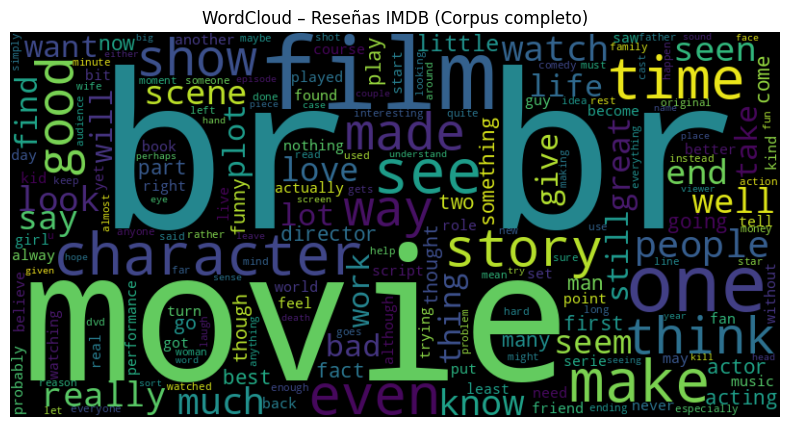

In [ ]:
# =======================================
# 3.5 WordCloud – Corpus completo
# =======================================

from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Texto completo del corpus
text_all = " ".join(df["review"].str.lower())

# Crear WordCloud
wordcloud_all = WordCloud(
    width=800,
    height=400,
    background_color="black",
    max_words=200
).generate(text_all)

# Visualizar
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_all, interpolation="bilinear")
plt.axis("off")
plt.title("WordCloud – Reseñas IMDB (Corpus completo)")
plt.show()


## 3.6 - WordCloud por clase de sentimiento

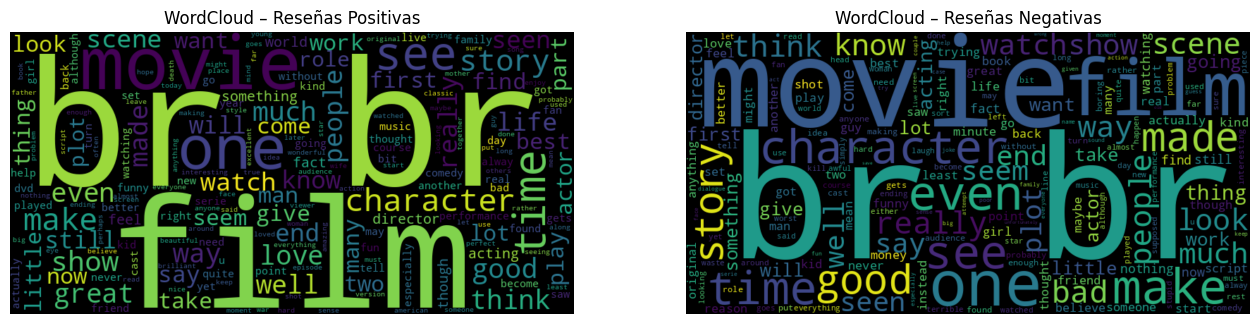

In [ ]:
# =======================================
# 3.6 - WordCloud por clase de sentimiento
# =======================================

# Texto positivo
text_positive = " ".join(
    df[df["sentiment"] == "positive"]["review"].str.lower()
)

# Texto negativo
text_negative = " ".join(
    df[df["sentiment"] == "negative"]["review"].str.lower()
)

# WordCloud positivo
wc_positive = WordCloud(
    width=800,
    height=400,
    background_color="black",
    max_words=200
).generate(text_positive)

# WordCloud negativo
wc_negative = WordCloud(
    width=800,
    height=400,
    background_color="black",
    max_words=200
).generate(text_negative)

# Visualización
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

axes[0].imshow(wc_positive, interpolation="bilinear")
axes[0].set_title("WordCloud – Reseñas Positivas")
axes[0].axis("off")

axes[1].imshow(wc_negative, interpolation="bilinear")
axes[1].set_title("WordCloud – Reseñas Negativas")
axes[1].axis("off")

plt.show()

La visualización mediante wordclouds permite identificar de forma rápida y cualitativa los términos más representativos del corpus. En el conjunto completo predominan palabras comunes del idioma inglés junto con términos propios del dominio cinematográfico, lo que refuerza los hallazgos del análisis de frecuencia previo.

Al analizar las reseñas por clase, se observan diferencias claras en los términos predominantes entre opiniones positivas y negativas, con palabras asociadas a valoraciones favorables en las primeras y expresiones de connotación crítica en las segundas. Estas diferencias anticipan la existencia de patrones semánticos relevantes para la tarea de clasificación del sentimiento y justifican la aplicación de modelos supervisados.

**Observaciones**

El análisis exploratorio permite concluir que:

* el texto contiene suficiente información semántica para la tarea de clasificación,
* el dataset es adecuado para aplicar tanto modelos clásicos como redes neuronales,
* el preprocesamiento jugará un rol clave en la calidad de las representaciones obtenidas.

# 4 - Preprocesamiento del texto

## 4.1 – Limpieza base del texto (HTML, minúsculas, caracteres no alfabéticos)

In [ ]:
# =======================================
# 4.1 Limpieza base (HTML, minúsculas, signos)
# =======================================

import re

def clean_text_basic(text: str) -> str:
    """
    Limpieza base para reseñas en inglés:
    - minúsculas
    - eliminación de tags HTML
    - eliminación de URLs
    - eliminación de caracteres no alfabéticos (se conservan espacios)
    - normalización de espacios
    """
    text = str(text).lower()

    # eliminar tags HTML (frecuente en IMDB: <br /><br />)
    text = re.sub(r"<.*?>", " ", text)

    # eliminar URLs
    text = re.sub(r"http\S+|www\S+", " ", text)

    # conservar solo letras y espacios (inglés)
    text = re.sub(r"[^a-z\s]", " ", text)

    # normalizar espacios
    text = re.sub(r"\s+", " ", text).strip()

    return text

# aplicar limpieza
df["review_clean_basic"] = df["review"].apply(clean_text_basic)

# mostrar ejemplos antes/después
sample = df.sample(5, random_state=42)[["review", "review_clean_basic", "sentiment"]]
sample


,review,review_clean_basic,sentiment
33553,I really liked this Summerslam due to the look...,i really liked this summerslam due to the look...,positive
9427,Not many television shows appeal to quite as m...,not many television shows appeal to quite as m...,positive
199,The film quickly gets to a major chase scene w...,the film quickly gets to a major chase scene w...,negative
12447,Jane Austen would definitely approve of this o...,jane austen would definitely approve of this o...,positive
39489,Expectations were somewhat high for me when I ...,expectations were somewhat high for me when i ...,negative


En esta etapa se aplica una limpieza base del texto para reducir ruido y estandarizar el formato de las reseñas. Se convierten los textos a minúsculas, se eliminan etiquetas HTML y URLs, y se conservan únicamente letras y espacios. Finalmente, se normalizan los espacios en blanco. El resultado es una columna depurada, lista para procesos posteriores como tokenización y normalización lingüística.

## Nota sobre el preprocesamiento intensivo

Nota de performance: Las secciones 4.2 (tokenización+stopwords) y 4.3 (lematización) son computacionalmente costosas (pueden demorar varios minutos).
Para evitar re-ejecutarlas en cada sesión, el dataset procesado se persiste en formato Parquet (sección 4.4) y, a partir de allí, el flujo continúa cargando el Parquet desde Drive (sección 4.5).
Solo se recomienda volver a correr 4.2/4.3 si se modifica el preprocesamiento.

## 4.2 - Tokenización y eliminación de stopwords

Objetivo:

* Dividir el texto en tokens (palabras)
* Eliminar stopwords del idioma inglés
* Preparar el texto para normalización lingüística y vectorización

In [ ]:
import re
import spacy

In [ ]:
# si no se encuentra instalado en el entorno:
!python -m spacy download en_core_web_sm -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 75.0 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [ ]:
# =======================================
# 4.2 Tokenización y eliminación de stopwords (spaCy - batch + verbose)
# =======================================

# ⚠️ BLOQUE DOCUMENTAL
# Este bloque no se ejecuta en corridas normales.
# El resultado se carga desde el archivo Parquet generado.

'''
from tqdm.auto import tqdm

nlp = spacy.load("en_core_web_sm", disable=["parser", "ner"])

texts = df["review_clean_basic"].astype(str).tolist()

tokens_list = []

# tqdm muestra el avance
for doc in tqdm(
    nlp.pipe(texts, batch_size=500, n_process=1),
    total=len(texts),
    desc="Procesando reseñas con spaCy"
):
    tokens = [
        tok.text
        for tok in doc
        if not tok.is_stop
        and not tok.is_punct
        and not tok.is_space
        and not tok.like_num
    ]
    tokens_list.append(tokens)

df["tokens"] = tokens_list

# ejemplo
df.sample(5, random_state=42)[["review_clean_basic", "tokens", "sentiment"]]
'''


'\nfrom tqdm.auto import tqdm\n\nnlp = spacy.load("en_core_web_sm", disable=["parser", "ner"])\n\ntexts = df["review_clean_basic"].astype(str).tolist()\n\ntokens_list = []\n\n# tqdm muestra el avance\nfor doc in tqdm(\n    nlp.pipe(texts, batch_size=500, n_process=1),\n    total=len(texts),\n    desc="Procesando reseñas con spaCy"\n):\n    tokens = [\n        tok.text\n        for tok in doc\n        if not tok.is_stop\n        and not tok.is_punct\n        and not tok.is_space\n        and not tok.like_num\n    ]\n    tokens_list.append(tokens)\n\ndf["tokens"] = tokens_list\n\n# ejemplo\ndf.sample(5, random_state=42)[["review_clean_basic", "tokens", "sentiment"]]\n'

La tokenización y eliminación de stopwords permitió reducir significativamente el ruido presente en el texto, eliminando términos de alta frecuencia con bajo contenido semántico. Como resultado, cada reseña queda representada por un conjunto más compacto de palabras informativas, lo que contribuye a disminuir la dimensionalidad del vocabulario y a mejorar la calidad de las representaciones textuales utilizadas en las etapas posteriores de modelado.

## 4.3 - Lematización del texto (spaCy – batch)

Objetivo

* Reducir las palabras a su forma canónica (lemma)
* Unificar variaciones morfológicas (liked → like, movies → movie)
* Mejorar la calidad semántica de las representaciones posteriores

In [ ]:
# =======================================
# 4.3 Lematización del texto (spaCy - batch)
# =======================================

# ⚠️ BLOQUE DOCUMENTAL
# Este bloque no se ejecuta en corridas normales.
# El resultado se carga desde el archivo Parquet generado.

'''
lemmas_list = []

for doc in tqdm(
    nlp.pipe(df["review_clean_basic"].astype(str).tolist(), batch_size=500, n_process=1),
    total=len(df),
    desc="Lematizando reseñas con spaCy"
):
    lemmas = [
        tok.lemma_
        for tok in doc
        if not tok.is_stop
        and not tok.is_punct
        and not tok.is_space
        and not tok.like_num
    ]
    lemmas_list.append(lemmas)

df["lemmas"] = lemmas_list

# ejemplo antes / después
df.sample(5, random_state=42)[
    ["review_clean_basic", "tokens", "lemmas", "sentiment"]
]
'''

'\nlemmas_list = []\n\nfor doc in tqdm(\n    nlp.pipe(df["review_clean_basic"].astype(str).tolist(), batch_size=500, n_process=1),\n    total=len(df),\n    desc="Lematizando reseñas con spaCy"\n):\n    lemmas = [\n        tok.lemma_\n        for tok in doc\n        if not tok.is_stop\n        and not tok.is_punct\n        and not tok.is_space\n        and not tok.like_num\n    ]\n    lemmas_list.append(lemmas)\n\ndf["lemmas"] = lemmas_list\n\n# ejemplo antes / después\ndf.sample(5, random_state=42)[\n    ["review_clean_basic", "tokens", "lemmas", "sentiment"]\n]\n'

En esta etapa se aplica lematización sobre el texto previamente limpiado y tokenizado. La lematización permite reducir las palabras a su forma base o canónica, unificando variantes morfológicas y preservando el significado semántico. Este proceso contribuye a disminuir la dimensionalidad del vocabulario y mejora la calidad de las representaciones textuales utilizadas en los modelos de clasificación.

## 4.4 - Persistencia del dataset procesado (Parquet)

**Objetivo de la persistencia**

En esta etapa se persiste en disco el dataset resultante de las fases de preprocesamiento intensivo del texto, que incluyen la limpieza, tokenización, eliminación de stopwords y lematización.

Dado que estas operaciones presentan un alto costo computacional, su ejecución reiterada en cada sesión del notebook no resulta eficiente. Por este motivo, el dataset procesado se guarda en formato Parquet, permitiendo su reutilización directa en ejecuciones posteriores.

**Flujo de trabajo adoptado**

* La generación del archivo Parquet se realiza una única vez, inmediatamente después de completar las secciones 4.2 y 4.3.

* En ejecuciones posteriores del notebook, el análisis continúa cargando el dataset procesado desde disco, evitando la recalculación de las etapas de preprocesamiento.

* Las secciones 4.2 y 4.3 solo deben volver a ejecutarse en caso de introducir cambios en las estrategias de limpieza, tokenización o normalización lingüística.

**Ventajas del enfoque**

* Reducción significativa de los tiempos de ejecución.

* Mayor reproducibilidad del análisis.

* Separación clara entre etapas de preprocesamiento y modelado.

* Persistencia de un dataset consistente y listo para vectorización y entrenamiento de modelos.


Nota: Este bloque debe ejecutarse únicamente cuando se recalcula el  preprocesamiento del texto. En el flujo habitual del notebook, se recomienda continuar directamente desde la sección 4.5 – Carga del dataset procesado (Parquet).

In [ ]:
# =======================================
# 4.4 Persistencia del dataset procesado (Parquet)
# =======================================

# ⚠️ EJECUTAR UNA SOLA VEZ
# Guarda el dataset preprocesado en Drive para reutilización

'''
import os

# 1) Montar Drive (si no está montado)
from google.colab import drive
drive.mount("/content/drive")

# 2) Definir carpeta de salida en Drive
OUT_DIR = "/content/drive/MyDrive/02_Coder-House/15-Data Science III/Proyecto Final DS3"
os.makedirs(OUT_DIR, exist_ok=True)

# 3) Archivo Parquet final
PARQUET_PATH = os.path.join(OUT_DIR, "imdb_processed.parquet")

# 4) Seleccionar columnas relevantes para persistir
cols_to_save = [
    "review",
    "sentiment",
    "review_clean_basic",
    "tokens",
    "lemmas"
]

df_to_save = df[cols_to_save].copy()

# 5) Guardar en Parquet
df_to_save.to_parquet(PARQUET_PATH, index=False)

print("✅ Parquet guardado en:", PARQUET_PATH)
print("Shape guardado:", df_to_save.shape)
df_to_save.head(3)
'''

'\nimport os\n\n# 1) Montar Drive (si no está montado)\nfrom google.colab import drive\ndrive.mount("/content/drive")\n\n# 2) Definir carpeta de salida en Drive\nOUT_DIR = "/content/drive/MyDrive/02_Coder-House/15-Data Science III/Proyecto Final DS3"\nos.makedirs(OUT_DIR, exist_ok=True)\n\n# 3) Archivo Parquet final\nPARQUET_PATH = os.path.join(OUT_DIR, "imdb_processed.parquet")\n\n# 4) Seleccionar columnas relevantes para persistir\ncols_to_save = [\n    "review",\n    "sentiment",\n    "review_clean_basic",\n    "tokens",\n    "lemmas"\n]\n\ndf_to_save = df[cols_to_save].copy()\n\n# 5) Guardar en Parquet\ndf_to_save.to_parquet(PARQUET_PATH, index=False)\n\nprint("✅ Parquet guardado en:", PARQUET_PATH)\nprint("Shape guardado:", df_to_save.shape)\ndf_to_save.head(3)\n'

## 4.5 - Gestión del preprocesamiento pesado (lectura desde Parquet)

**Nota sobre el preprocesamiento**

Las etapas de tokenización y lematización mediante spaCy (Secciones 4.2 y 4.3) implican un costo computacional elevado debido al tamaño del dataset y al análisis lingüístico profundo realizado sobre cada reseña.

Para optimizar la reproducibilidad del análisis y evitar la ejecución repetida de estos procesos, el [dataset resultante](https://drive.google.com/file/d/16jJ_T_MRNpHvDd2LjpP4yqQsy7fkNyyV/view?usp=drive_link) se persiste en formato Parquet. A partir de este punto, el flujo de trabajo continúa cargando directamente el dataset procesado desde disco, garantizando eficiencia, consistencia y tiempos de ejecución reducidos.

En caso de requerir la regeneración del dataset (por ejemplo, ante cambios en el preprocesamiento), las Secciones 4.2 y 4.3 pueden volver a ejecutarse manualmente.

In [ ]:
# =======================================
# 4.5 Carga del dataset procesado (Parquet)
# =======================================

import pandas as pd
from google.colab import drive

# Montar Drive (si no está montado)
drive.mount("/content/drive")

PARQUET_PATH = "/content/drive/MyDrive/02_Coder-House/15-Data Science III/Proyecto Final DS3/imdb_processed.parquet"

df = pd.read_parquet(PARQUET_PATH)

print("✅ Dataset cargado desde Parquet")
print("Shape:", df.shape)

df.head(3)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
✅ Dataset cargado desde Parquet
Shape: (50000, 5)


,review,sentiment,review_clean_basic,tokens,lemmas
0,One of the other reviewers has mentioned that ...,positive,one of the other reviewers has mentioned that ...,"[reviewers, mentioned, watching, oz, episode, ...","[reviewer, mention, watch, oz, episode, ll, ho..."
1,A wonderful little production. <br /><br />The...,positive,a wonderful little production the filming tech...,"[wonderful, little, production, filming, techn...","[wonderful, little, production, filming, techn..."
2,I thought this was a wonderful way to spend ti...,positive,i thought this was a wonderful way to spend ti...,"[thought, wonderful, way, spend, time, hot, su...","[think, wonderful, way, spend, time, hot, summ..."


## 4.6 - Validación del dataset preprocesado

Antes de avanzar hacia las etapas de vectorización y modelado, se realiza una validación rápida del dataset cargado desde el archivo Parquet.  
El objetivo es confirmar la integridad de los datos y la correcta aplicación de las transformaciones previas.

Se verifica:
- la estructura general del dataset,
- la ausencia de valores nulos en las columnas clave,
- la coherencia entre texto original, tokens y lemas,
- y la disponibilidad de las representaciones necesarias para las etapas posteriores.

Esta validación garantiza que el dataset se encuentra en condiciones adecuadas para su uso en modelos de análisis de sentimiento basados en representaciones vectoriales y redes neuronales.


In [ ]:
# =========================================
# 4.6 Validación del dataset preprocesado
# =========================================

# Estructura general
print("Estructura del dataset:")
df.info()

# Valores nulos por columna
print("\nValores nulos por columna:")
print(df.isna().sum())

# Longitud promedio de tokens y lemas
df["tokens_len"] = df["tokens"].apply(len)
df["lemmas_len"] = df["lemmas"].apply(len)

print("\nLongitud promedio:")
print(f"Tokens: {df['tokens_len'].mean():.2f}")
print(f"Lemas : {df['lemmas_len'].mean():.2f}")

# Ejemplo de una fila completa
print("\nEjemplo de registro preprocesado:")
df.sample(1, random_state=42)[
    ["review", "review_clean_basic", "tokens", "lemmas", "sentiment"]
]

Estructura del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   review              50000 non-null  object
 1   sentiment           50000 non-null  object
 2   review_clean_basic  50000 non-null  object
 3   tokens              50000 non-null  object
 4   lemmas              50000 non-null  object
dtypes: object(5)
memory usage: 1.9+ MB

Valores nulos por columna:
review                0
sentiment             0
review_clean_basic    0
tokens                0
lemmas                0
dtype: int64

Longitud promedio:
Tokens: 108.38
Lemas : 108.38

Ejemplo de registro preprocesado:


,review,review_clean_basic,tokens,lemmas,sentiment
33553,I really liked this Summerslam due to the look...,i really liked this summerslam due to the look...,"[liked, summerslam, look, arena, curtains, loo...","[like, summerslam, look, arena, curtain, look,...",positive


# 5 - Vectorización del texto

Los algoritmos de Machine Learning requieren representaciones numéricas de los datos de entrada.  
En el caso del análisis de sentimiento, el texto debe transformarse en vectores que capturen información semántica relevante.

La vectorización convierte documentos de texto en matrices numéricas donde cada fila representa una reseña y cada columna representa una característica textual.  
Estas características pueden construirse a partir de la frecuencia de palabras, su importancia relativa o representaciones más complejas.

En esta sección se exploran distintos enfoques de vectorización, comenzando por métodos clásicos como Bag of Words y TF-IDF, que sirven como base para modelos supervisados de clasificación.


## 5.1 – Bag of Words (BoW)

El modelo Bag of Words representa cada documento como un vector de conteos de palabras, ignorando el orden y la estructura gramatical del texto.

Cada dimensión del vector corresponde a un término del vocabulario, y su valor indica cuántas veces aparece dicho término en el documento.  
Si bien este enfoque es simple, suele ser efectivo como línea base para tareas de clasificación de texto.


In [ ]:
# =========================================
# 5.1 Bag of Words (CountVectorizer)
# =========================================

from sklearn.feature_extraction.text import CountVectorizer

# Unir lemas en texto plano
texts_lemmas = df["lemmas"].apply(lambda x: " ".join(x))

# Vectorizador BoW
bow_vectorizer = CountVectorizer(
    max_features=5000,   # limitar dimensionalidad
    min_df=5             # eliminar términos muy raros
)

X_bow = bow_vectorizer.fit_transform(texts_lemmas)

print("Matriz Bag of Words")
print("Shape:", X_bow.shape)

Matriz Bag of Words
Shape: (50000, 5000)


La representación Bag of Words genera una matriz dispersa de alta dimensionalidad, donde cada término del vocabulario constituye una característica.

Si bien este enfoque no captura relaciones semánticas ni contexto, proporciona una base sólida y eficiente para modelos de clasificación tradicionales, y permite evaluar rápidamente el impacto del preprocesamiento sobre la dimensionalidad del problema.

La dimensionalidad final (5.000 features) representa un compromiso entre expresividad del vocabulario y eficiencia computacional, permitiendo entrenar modelos lineales de forma eficiente desde el punto de vista computacional.

## 5.2 – TF-IDF (Term Frequency – Inverse Document Frequency)

El modelo TF-IDF extiende el enfoque Bag of Words incorporando un esquema de ponderación
que penaliza los términos muy frecuentes en el corpus y resalta aquellos que son más
discriminativos a nivel documento.

Mientras que Bag of Words considera únicamente la frecuencia absoluta de los términos,
TF-IDF ajusta dicho conteo en función de cuántos documentos contienen cada palabra,
reduciendo el peso de términos comunes y aumentando el de aquellos más informativos.

Este enfoque suele mejorar el desempeño de modelos de clasificación de texto,
especialmente en tareas de análisis de sentimiento, al capturar mejor la relevancia
semántica de los términos.


In [ ]:
# =======================================
# 5.2 TF-IDF (TfidfVectorizer)
# =======================================

from sklearn.feature_extraction.text import TfidfVectorizer

# Reutilizamos los textos lematizados
texts_lemmas = df["lemmas"].apply(lambda x: " ".join(x))

# Vectorizador TF-IDF
tfidf_vectorizer = TfidfVectorizer(
    max_features=5000,   # misma dimensionalidad que BoW para comparar
    min_df=5
)

X_tfidf = tfidf_vectorizer.fit_transform(texts_lemmas)

print("Matriz TF-IDF")
print("Shape:", X_tfidf.shape)


Matriz TF-IDF
Shape: (50000, 5000)


La representación TF-IDF mantiene la misma dimensionalidad que Bag of Words, pero introduce
una ponderación más informativa de los términos, reduciendo la influencia de palabras muy
frecuentes y destacando aquellas con mayor poder discriminativo.

Esta característica suele traducirse en mejores resultados para modelos lineales de
clasificación, sin incrementar significativamente el costo computacional.


## 5.3 – Comparación conceptual entre Bag of Words y TF-IDF

Bag of Words (BoW) y TF-IDF son métodos clásicos de vectorización que transforman texto en
representaciones numéricas aptas para modelos de Machine Learning supervisado.

Ambos enfoques comparten la misma estructura general: representan cada documento como un
vector en un espacio de términos, donde cada dimensión corresponde a una palabra del
vocabulario. Sin embargo, difieren en la forma en que ponderan la importancia de cada término.

Bag of Words utiliza frecuencias absolutas, lo que puede provocar que términos muy comunes
dominen la representación. En cambio, TF-IDF introduce un factor de penalización global que
reduce el peso de palabras frecuentes en el corpus y resalta aquellas más discriminativas.

Esta diferencia hace que TF-IDF suela ofrecer mejores resultados en tareas de clasificación
de texto, sin incrementar significativamente la complejidad computacional.


| Característica              | Bag of Words (BoW)              | TF-IDF                         |
|----------------------------|----------------------------------|--------------------------------|
| Tipo de ponderación        | Frecuencia absoluta              | Frecuencia ponderada           |
| Penaliza términos comunes  | ❌ No                             | ✅ Sí                           |
| Sensibilidad al corpus     | Baja                              | Alta                            |
| Interpretabilidad          | Muy alta                          | Alta                            |
| Dimensionalidad            | Alta                              | Alta                            |
| Costo computacional        | Bajo                              | Bajo–medio                     |
| Uso típico                 | Baseline, pruebas rápidas        | Clasificación de texto         |


Desde el punto de vista dimensional, ambos métodos generan matrices dispersas de gran tamaño,
donde el número de columnas depende del vocabulario seleccionado (en este caso, 5.000
términos).

La diferencia principal no radica en la dimensionalidad, sino en la distribución de los
pesos dentro de la matriz. TF-IDF produce representaciones más balanceadas, reduciendo la
influencia de términos frecuentes y mejorando la capacidad discriminativa de los modelos
lineales.


**Conclusión:**

En este proyecto, Bag of Words se utiliza como línea base para evaluar el impacto del
preprocesamiento, mientras que TF-IDF se adopta como representación preferida para los
modelos de clasificación, al ofrecer un mejor equilibrio entre simplicidad, eficiencia
computacional y capacidad predictiva.


# 6 - Análisis exploratorio del texto

**Objetivo de la sección**

Antes de entrenar modelos, resulta fundamental explorar el contenido lingüístico del corpus ya preprocesado.
Esta sección tiene como objetivo:

* Identificar términos más frecuentes en el dataset
* Analizar patrones léxicos generales y por clase de sentimiento
* Visualizar diferencias semánticas entre reseñas positivas y negativas
* Generar intuiciones que luego ayuden a interpretar los resultados de los modelos

## 6.0 – Post-procesamiento de lemmas

Limpieza final para análisis exploratorio (EDA)


In [ ]:
# =======================================
# 6.0 – Post-procesamiento de lemmas (limpieza final para análisis exploratorio)
# =======================================

ruido = {"s","t","nt","ve","re","ll","d","m"}  # residuos típicos de contracciones
df["lemmas_clean"] = df["lemmas"].apply(
    lambda lst: [w for w in lst if isinstance(w, str) and w.isalpha() and len(w) > 1 and w not in ruido]
)

# Chequeos rápidos
print("Ejemplo antes:", df["lemmas"].iloc[0][:25])
print("Ejemplo después:", df["lemmas_clean"].iloc[0][:25])

# % de tokens removidos (aprox)
orig = df["lemmas"].apply(len).sum()
clean = df["lemmas_clean"].apply(len).sum()
print(f"Tokens totales antes: {orig:,}")
print(f"Tokens totales después: {clean:,}")
print(f"Removidos: {(orig-clean)/orig:.2%}")


Ejemplo antes: ['reviewer' 'mention' 'watch' 'oz' 'episode' 'll' 'hook' 'right' 'exactly'
 'happen' 'thing' 'strike' 'oz' 'brutality' 'unflinche' 'scene' 'violence'
 'set' 'right' 'word' 'trust' 'faint' 'hearted' 'timid' 'pull']
Ejemplo después: ['reviewer', 'mention', 'watch', 'oz', 'episode', 'hook', 'right', 'exactly', 'happen', 'thing', 'strike', 'oz', 'brutality', 'unflinche', 'scene', 'violence', 'set', 'right', 'word', 'trust', 'faint', 'hearted', 'timid', 'pull', 'punch']
Tokens totales antes: 5,419,245
Tokens totales después: 5,168,011
Removidos: 4.64%


## 6.1.1 - Frecuencia de palabras (Word Frequency)

**Objetivo**

* Analizar los términos más frecuentes del corpus preprocesado para:
  * validar la calidad del texto
  * identificar patrones léxicos dominantes
  * generar intuiciones previas al modelado

In [ ]:
from collections import Counter
import pandas as pd

# Unir todos los lemas en una sola lista (corpus completo)
all_lemmas = [w for doc in df["lemmas_clean"] for w in doc]

print("Cantidad total de tokens (lemmas_clean):", len(all_lemmas))

Cantidad total de tokens (lemmas_clean): 5168011


## 6.1.2 - Top de términos más frecuentes

Se calcula la frecuencia y se visualiza un top 15 para entender qué conceptos dominan el corpus.

In [ ]:
# Contar frecuencia
lemma_freq = Counter(all_lemmas)

# Convertir a DataFrame ordenado
freq_df = (
    pd.DataFrame(lemma_freq.items(), columns=["lemma", "frequency"])
      .sort_values(by="frequency", ascending=False)
      .reset_index(drop=True)
)

# Top 15
freq_df.head(15)

,lemma,frequency
0,movie,103277
1,film,95406
2,like,44222
3,good,41182
4,time,31523
5,character,28360
6,watch,27823
7,bad,26583
8,story,25277
9,see,24815


## 6.1.3 - Validación 1: chequeo de tokens HTML candidatos

Se verifica que no hayan quedado tokens típicos de HTML/escape (por ejemplo `br`, `quot`, `amp`, `html`).
Si aparece alguno con frecuencia alta, conviene revisar limpieza previa del texto.

In [ ]:
# Chequeo de HTML candidatos (br, quot, amp, html)
candidatos = {"br", "quot", "amp", "html"}

top50 = (
    pd.Series(all_lemmas)
      .value_counts()
      .head(50)
)

top50[top50.index.isin(candidatos)]

,count


Como devuelve una serie vacía, no hay “basura HTML” dominante.

## 6.1.4 - Validación 2: frecuencia de negaciones

Las negaciones suelen ser importantes para sentimiento (ej. “not good”).
Se mide su presencia para saber si el pipeline las conserva (idealmente sí).

In [ ]:
neg = {"not", "no", "never"}

counts = pd.Series(all_lemmas).value_counts()

print("Frecuencia de negaciones:")
for w in neg:
    print(f"{w}: {counts.get(w, 0)}")

Frecuencia de negaciones:
not: 1149
no: 2
never: 0


Esto significa que:

* `not` aparece (bien),
* `no` casi no aparece (esperable en IMDB)
* `never` es cero por lo cual no es un problema.

## 6.1.5 - Validación 3: tokens raros en `lemmas_clean`

Se controla que no queden tokens de longitud 1 o no alfabéticos (ruido típico que puede colarse).
En este caso dio 0, lo cual es excelente.

In [ ]:
# verificación para tokens raros en lemmas_clean
weird = [w for w in all_lemmas if (len(w) <= 1 or not w.isalpha())]

print("Cantidad tokens raros:", len(weird))
print("Ejemplos:", weird[:20])

Cantidad tokens raros: 0
Ejemplos: []


**Conclusión**

A partir del top de términos, suelen aparecer:

* **Vocabulario del dominio** (movie, film, story, character).
* **Términos evaluativos** (good, great, bad), lo cual es coherente con análisis de sentimiento.
* Validaciones técnicas correctas:

  * No aparecen tokens HTML relevantes en el top.
  * Las negaciones están presentes (al menos `not`).
  * No quedan tokens raros/no alfabéticos en `lemmas_clean`.

Con estos resultados se confirma que el corpus preprocesado es consistente, libre de ruido significativo y adecuado para avanzar hacia visualizaciones textuales y etapas posteriores de representación y modelado del texto.

## 6.2 - WordCloud general

El WordCloud permite visualizar de forma intuitiva la distribución de términos
más frecuentes en el corpus preprocesado. Esta representación complementa
el análisis cuantitativo de frecuencias, facilitando la detección visual de
patrones léxicos dominantes y posibles residuos de ruido.

El WordCloud se construye a partir de los lemas limpiados (`lemmas_clean`),
asegurando coherencia con el preprocesamiento aplicado previamente.


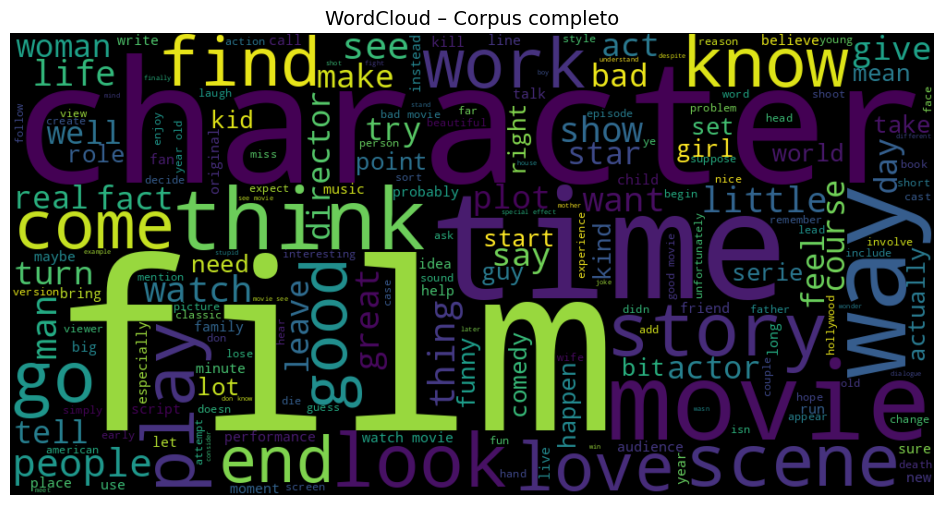

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

text_for_wc = " ".join(all_lemmas)

wc = WordCloud(
    width=1000,
    height=500,
    background_color="black",
    max_words=200
).generate(text_for_wc)

plt.figure(figsize=(12, 6))
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.title("WordCloud – Corpus completo", fontsize=14)
plt.show()


**Interpretación**

- Refuerza visualmente los resultados del análisis de frecuencia de palabras
- Destaca conceptos semánticamente relevantes del dominio audiovisual
- Permite detectar rápidamente la presencia de ruido residual
- Confirma la coherencia del corpus con la tarea de análisis de sentimiento


## 6.3 - WordCloud por clase de sentimiento

**Descripción**

Para analizar diferencias semánticas entre reseñas positivas y negativas, se generan WordClouds separados por clase de sentimiento.
Esta visualización permite identificar términos característicos de cada grupo y evaluar visualmente el grado de separación léxica entre clases.

El análisis se realiza sobre los lemmas previamente limpiados (`lemmas_clean`), garantizando consistencia con las etapas anteriores del preprocesamiento.

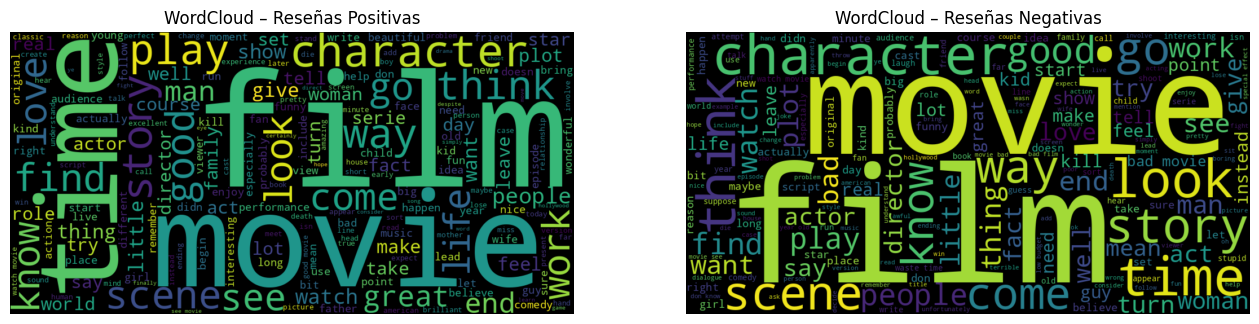

In [ ]:
# =======================================
# 6.3 – WordCloud por clase de sentimiento
# =======================================

from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Separar lemas LIMPIOS por sentimiento
lemmas_pos = [
    w for doc in df[df["sentiment"] == "positive"]["lemmas_clean"] for w in doc
]

lemmas_neg = [
    w for doc in df[df["sentiment"] == "negative"]["lemmas_clean"] for w in doc
]

# Convertir a texto
text_pos = " ".join(lemmas_pos)
text_neg = " ".join(lemmas_neg)

# Generar WordClouds
wc_pos = WordCloud(
    width=1000,
    height=500,
    background_color="black",
    max_words=200
).generate(text_pos)

wc_neg = WordCloud(
    width=1000,
    height=500,
    background_color="black",
    max_words=200
).generate(text_neg)

# Visualización
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

axes[0].imshow(wc_pos, interpolation="bilinear")
axes[0].axis("off")
axes[0].set_title("WordCloud – Reseñas Positivas")

axes[1].imshow(wc_neg, interpolation="bilinear")
axes[1].axis("off")
axes[1].set_title("WordCloud – Reseñas Negativas")

plt.show()


**Interpretación**

- En las **reseñas positivas** predominan términos asociados a disfrute, valoración y recomendación
  (por ejemplo, `love`, `good`, `great`, `enjoy`), junto con palabras vinculadas al contenido narrativo
  (`story`, `character`, `scene`).

- En las **reseñas negativas** se observan términos asociados a crítica y evaluación desfavorable
  (como `bad`), así como vocabulario descriptivo que suele aparecer en contextos de insatisfacción
  o análisis negativo de la experiencia (`problem`, `work`, `make`).

- La diferencia visual entre ambos WordClouds evidencia una separación semántica clara entre clases, lo que anticipa un buen desempeño de modelos supervisados de clasificación de sentimiento.


## 6.4 – Términos más representativos por sentimiento

Con el objetivo de profundizar en las diferencias léxicas entre reseñas positivas y negativas, se analizan los términos más frecuentes dentro de cada clase utilizando los lemmas previamente normalizados (`lemmas_clean`).  

Este análisis permite identificar palabras dominantes asociadas a la valoración positiva o negativa, complementando las visualizaciones previas y aportando evidencia cuantitativa de la separación semántica entre clases.


In [ ]:
# ==========================================
# 6.4 – Términos más representativos por sentimiento
# Visualización lado a lado (Top 15 por clase)
# ==========================================

import pandas as pd
from collections import Counter
from IPython.display import display

# --- 1) Separar lemmas_clean por sentimiento ---
lemmas_pos = [
    w
    for doc in df.loc[df["sentiment"] == "positive", "lemmas_clean"]
    for w in doc
]

lemmas_neg = [
    w
    for doc in df.loc[df["sentiment"] == "negative", "lemmas_clean"]
    for w in doc
]

# --- 2) Contar frecuencias ---
freq_pos = Counter(lemmas_pos)
freq_neg = Counter(lemmas_neg)

# --- 3) Top 15 por clase (ranking independiente) ---
TOP_N = 15

top_pos = pd.DataFrame(
    freq_pos.most_common(TOP_N),
    columns=["Lemma (Positivo)", "Frecuencia"]
)

top_neg = pd.DataFrame(
    freq_neg.most_common(TOP_N),
    columns=["Lemma (Negativo)", "Frecuencia"]
)

# --- 4) Mostrar tablas lado a lado SIN mezclar rankings ---
display(
    pd.concat(
        [top_pos.reset_index(drop=True),
         top_neg.reset_index(drop=True)],
        axis=1
    )
)


,Lemma (Positivo),Frecuencia,Lemma (Negativo),Frecuencia
0,film,50643,movie,58432
1,movie,44845,film,44763
2,good,22849,like,24156
3,like,20066,bad,21949
4,time,16342,good,18333
5,great,14375,time,15181
6,story,14185,watch,14948
7,character,14028,character,14332
8,see,13045,think,12064
9,watch,12875,see,11770


**Conclusión**

El análisis de frecuencias por clase revela patrones léxicos consistentes y diferencias semánticas claras entre reseñas positivas y negativas.

Si bien ambas clases comparten vocabulario descriptivo propio del dominio cinematográfico (como `movie`, `film` o `character`), las **reseñas positivas** presentan mayor presencia de términos asociados a disfrute y valoración (por ejemplo, `good`, `great`, `love`), mientras que en las **reseñas negativas** aparecen con mayor frecuencia palabras vinculadas a evaluación crítica o insatisfacción (como `bad`), junto con un uso más neutro de verbos descriptivos.

Cabe destacar que algunos términos positivos como `good` también aparecen en reseñas negativas, generalmente asociados a estructuras de negación o contraste, lo cual refuerza la necesidad de modelos supervisados para capturar el contexto.

Estos resultados confirman que el preprocesamiento aplicado fue efectivo y que el corpus contiene señales lingüísticas relevantes para la clasificación de sentimiento, respaldando el uso de representaciones vectoriales como Bag of Words y TF-IDF en los modelos supervisados que se desarrollan en la siguiente sección.

# 7 - Representación Vectorial (TF-IDF)

## 7.1 - Vectorización TF-IDF con Unigramas y Bigramas

**Objetivo**

Transformar el texto preprocesado en una representación numérica adecuada para modelos de clasificación supervisada.

Se utiliza TF-IDF incorporando unigramas y bigramas, lo que permite capturar tanto términos individuales como combinaciones locales de palabras (por ejemplo, negaciones o expresiones compuestas), enriqueciendo la señal semántica para el análisis de sentimiento.

In [ ]:
# =======================================
# 7.1 – Vectorización TF-IDF (unigramas + bigramas)
# =======================================

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

# Construcción del texto a partir de los lemas preprocesados
df["text_lemmas"] = df["lemmas_clean"].apply(lambda x: " ".join(x))

X = df["text_lemmas"]
y = df["sentiment"]

# División del dataset en conjuntos de entrenamiento y test
# Se utiliza estratificación para preservar la proporción de clases
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

# Inicialización del vectorizador TF-IDF con unigramas y bigramas
tfidf = TfidfVectorizer(
    ngram_range=(1, 2),
    min_df=5,          # elimina términos poco frecuentes
    max_df=0.9,        # elimina términos demasiado frecuentes
    max_features=30000 # controla la dimensionalidad del espacio vectorial
)

# Ajuste del vectorizador sobre el conjunto de entrenamiento
X_train_tfidf = tfidf.fit_transform(X_train)

# Transformación del conjunto de test
X_test_tfidf = tfidf.transform(X_test)

print("Dimensión TF-IDF (train):", X_train_tfidf.shape)
print("Dimensión TF-IDF (test):", X_test_tfidf.shape)

# Visualización de algunas features generadas
tfidf.get_feature_names_out()[:15]


Dimensión TF-IDF (train): (40000, 30000)
Dimensión TF-IDF (test): (10000, 30000)


array(['aaliyah', 'aamir', 'aamir khan', 'aaron', 'aaron carter', 'ab',
       'abandon', 'abandonment', 'abba', 'abbey', 'abbot', 'abbott',
       'abbott costello', 'abby', 'abc'], dtype=object)

La matriz TF-IDF resultante presenta una dimensionalidad elevada, acorde al tamaño del corpus y al uso de unigramas y bigramas.  
Entre las features generadas se observan tanto términos generales del lenguaje como nombres propios (por ejemplo, actores o personajes), lo cual es esperable en reseñas cinematográficas y no afecta negativamente el desempeño de los modelos supervisados.

## 7.2 - Modelo Base: Regresión Logística

**Objetivo**

Entrenar un modelo supervisado base para la clasificación de sentimiento utilizando la representación TF-IDF con unigramas y bigramas.
La Regresión Logística se emplea como baseline por su simplicidad, interpretabilidad y buen desempeño en problemas de texto de alta dimensionalidad.

Este modelo permite:

* establecer una línea base de rendimiento,
* evaluar la calidad de la representación vectorial,
* analizar la capacidad del modelo para separar reseñas positivas y negativas.

In [ ]:
# =======================================
# 7.2 – Modelo base: Regresión Logística
# =======================================

from sklearn.linear_model import LogisticRegression

# Inicialización del modelo
log_reg = LogisticRegression(
    max_iter=1000,
    n_jobs=-1
)

# Entrenamiento
log_reg.fit(X_train_tfidf, y_train)

LogisticRegression(max_iter=1000, n_jobs=-1)

In [ ]:
# =======================================
# Evaluación del modelo
# =======================================

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Predicciones
y_pred = log_reg.predict(X_test_tfidf)

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

# Reporte de clasificación
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Matriz de confusión
cm = confusion_matrix(y_test, y_pred)
cm

Accuracy: 0.8970

Classification Report:
              precision    recall  f1-score   support

    negative       0.91      0.89      0.90      5000
    positive       0.89      0.91      0.90      5000

    accuracy                           0.90     10000
   macro avg       0.90      0.90      0.90     10000
weighted avg       0.90      0.90      0.90     10000



array([[4427,  573],
       [ 457, 4543]])

**Conclusión**

El modelo base de Regresión Logística entrenado sobre representaciones TF-IDF con unigramas y bigramas alcanza un desempeño sólido, con una accuracy cercana al 90% y métricas balanceadas entre ambas clases.

Estos resultados confirman que la representación vectorial utilizada captura de forma efectiva señales léxicas y semánticas relevantes para la clasificación de sentimiento en reseñas cinematográficas. Asimismo, la distribución equilibrada de errores en la matriz de confusión indica que el modelo no presenta sesgos significativos hacia ninguna de las clases.

En este contexto, la Regresión Logística se establece como una línea base robusta y adecuada, que servirá como punto de comparación para modelos más complejos en las siguientes secciones.

## 7.3 – Modelo alternativo: Random Forest (TF-IDF unigram+bigram)

En esta sección se entrena un modelo no lineal basado en árboles (Random Forest) utilizando la representación TF-IDF con unigrams y bigrams. El objetivo es contrastar su desempeño con el modelo lineal base y analizar el impacto de capturar relaciones no lineales entre las características del texto.

In [ ]:
# =========================================================
# 7.3 – Modelo alternativo: Random Forest
# =========================================================

import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# ---------------------------------------------------------
# Entrenamiento del modelo
# ---------------------------------------------------------
# Se utilizan hiperparámetros moderados para evitar sobreajuste,
# dado el alto número de features generado por TF-IDF.

rf_model = RandomForestClassifier(
    n_estimators=300,
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    max_features="sqrt",
    n_jobs=-1,
    random_state=42,
    verbose=1
)

rf_model.fit(X_train_tfidf, y_train)

# ---------------------------------------------------------
# Evaluación del modelo
# ---------------------------------------------------------
y_pred_rf = rf_model.predict(X_test_tfidf)

accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Accuracy (Random Forest): {accuracy_rf:.4f}\n")

print("Classification Report – Random Forest:")
print(classification_report(y_test, y_pred_rf))

# ---------------------------------------------------------
# Matriz de confusión
# ---------------------------------------------------------
cm_rf = confusion_matrix(y_test, y_pred_rf)

cm_rf_df = pd.DataFrame(
    cm_rf,
    index=["true_negative", "true_positive"],
    columns=["pred_negative", "pred_positive"]
)

display(cm_rf_df)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:  4.3min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  6.5min finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.3s
[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:    1.4s


Accuracy (Random Forest): 0.8618

Classification Report – Random Forest:
              precision    recall  f1-score   support

    negative       0.86      0.86      0.86      5000
    positive       0.86      0.87      0.86      5000

    accuracy                           0.86     10000
   macro avg       0.86      0.86      0.86     10000
weighted avg       0.86      0.86      0.86     10000



[Parallel(n_jobs=2)]: Done 300 out of 300 | elapsed:    2.2s finished


,pred_negative,pred_positive
true_negative,4289,711
true_positive,671,4329


El modelo Random Forest entrenado sobre la representación TF-IDF con unigrams y bigrams alcanza un desempeño sólido, con una accuracy cercana al 86%.

Sin embargo, al compararlo con la Regresión Logística, se observa un rendimiento inferior, lo cual resulta consistente con la literatura en problemas de clasificación de texto de alta dimensionalidad y representaciones dispersas.

Estos resultados refuerzan que, para este corpus y este tipo de representación vectorial, los modelos lineales constituyen una línea base más eficiente y robusta.

El análisis comparativo permite validar tanto la calidad del preprocesamiento como la adecuación de TF-IDF para la tarea de clasificación de sentimiento.

## 7.4 – Bag of Words (BoW) + Regresión Logística

En esta sección se entrena un modelo lineal (Regresión Logística) usando una representación BoW con unigrams y bigrams, para comparar contra TF-IDF.

Se reportan métricas estándar (accuracy, classification report y matriz de confusión) sobre el conjunto de test.

In [ ]:
# ======================================================
# 7.4 – Bag of Words (unigrams + bigrams) + Regresión Logística
# ======================================================

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# ------------------------------------------------------
# Preparación del texto
# ------------------------------------------------------
# Los documentos se reconstruyen como strings a partir de lemmas_clean,
# ya que CountVectorizer espera texto y no listas de tokens.

X_train_text = df.loc[y_train.index, "lemmas_clean"].apply(" ".join)
X_test_text  = df.loc[y_test.index, "lemmas_clean"].apply(" ".join)

# ------------------------------------------------------
# Vectorización Bag of Words (unigrams + bigrams)
# ------------------------------------------------------
vectorizer_bow = CountVectorizer(
    ngram_range=(1, 2),
    min_df=5,
    max_df=0.95
)

X_train_bow = vectorizer_bow.fit_transform(X_train_text)
X_test_bow  = vectorizer_bow.transform(X_test_text)

print("Dimensión BoW (train):", X_train_bow.shape)
print("Dimensión BoW (test):", X_test_bow.shape)

# ------------------------------------------------------
# Modelo: Regresión Logística
# ------------------------------------------------------
bow_logreg = LogisticRegression(
    max_iter=1000,
    n_jobs=-1
)

bow_logreg.fit(X_train_bow, y_train)

# ------------------------------------------------------
# Evaluación del modelo
# ------------------------------------------------------
y_pred_bow = bow_logreg.predict(X_test_bow)

accuracy_bow = accuracy_score(y_test, y_pred_bow)
print(f"\nAccuracy (BoW + Regresión Logística): {accuracy_bow:.4f}")

print("\nClassification Report (BoW + Regresión Logística):")
print(classification_report(y_test, y_pred_bow))

# ------------------------------------------------------
# Matriz de confusión
# ------------------------------------------------------
cm_bow = confusion_matrix(y_test, y_pred_bow)

cm_bow_df = pd.DataFrame(
    cm_bow,
    index=["true_negative", "true_positive"],
    columns=["pred_negative", "pred_positive"]
)

display(cm_bow_df)

# ------------------------------------------------------
# Verificación de features generadas
# ------------------------------------------------------
feature_names_bow = vectorizer_bow.get_feature_names_out()
print("\nEjemplo de features BoW:")
print(feature_names_bow[:25])


Dimensión BoW (train): (40000, 125469)
Dimensión BoW (test): (10000, 125469)

Accuracy (BoW + Regresión Logística): 0.8974

Classification Report (BoW + Regresión Logística):
              precision    recall  f1-score   support

    negative       0.90      0.89      0.90      5000
    positive       0.89      0.90      0.90      5000

    accuracy                           0.90     10000
   macro avg       0.90      0.90      0.90     10000
weighted avg       0.90      0.90      0.90     10000



,pred_negative,pred_positive
true_negative,4450,550
true_positive,476,4524



Ejemplo de features BoW:
['aa' 'aaa' 'aag' 'aaliyah' 'aames' 'aamir' 'aamir khan' 'aardman' 'aaron'
 'aaron altman' 'aaron carter' 'aaron eckhart' 'aaron sorkin' 'ab' 'aback'
 'abandon' 'abandon baby' 'abandon building' 'abandon car' 'abandon film'
 'abandon hotel' 'abandon house' 'abandon school' 'abandonment' 'abba']


**Conclusión**

El modelo de Regresión Logística entrenado con una representación Bag of Words
utilizando unigrams y bigrams alcanza un desempeño comparable al obtenido con
TF-IDF, con una accuracy cercana al 0.90 y métricas balanceadas entre clases.

La elevada dimensionalidad del espacio BoW es consistente con el tamaño del
corpus y la inclusión de bigrams, y no impacta negativamente en el rendimiento
del modelo supervisado.

Estos resultados indican que, para este problema de clasificación de
sentimiento, tanto TF-IDF como Bag of Words constituyen representaciones
adecuadas, siendo TF-IDF preferible desde el punto de vista de eficiencia
computacional, mientras que BoW ofrece una interpretación más directa de las
frecuencias léxicas.


## 7.5 – Comparación de modelos

Objetivo
--------
Comparar el desempeño de los modelos clásicos entrenados sobre el mismo split
de entrenamiento/test para establecer una referencia final de rendimiento.

Modelos comparados:
- Regresión Logística + TF-IDF (unigrams + bigrams)
- Regresión Logística + BoW (unigrams + bigrams)
- Random Forest + TF-IDF (unigrams + bigrams) según la implementación previa

Métricas
--------
Se resumen Accuracy, Precision, Recall y F1-Score (macro promedio) para facilitar
la comparación entre enfoques.

## 7.5 - Comparación de modelos (resumen)

En esta sección se comparan los enfoques clásicos de clasificación de sentimiento entrenados sobre el mismo conjunto de datos y partición de entrenamiento/test.

Se consideran los siguientes modelos:

- Regresión Logística con representación **TF-IDF (unigramas + bigramas)**.
- Regresión Logística con representación **Bag of Words (unigramas + bigramas)**.
- **Random Forest** entrenado sobre la representación TF-IDF.

La comparación se realiza utilizando métricas globales de desempeño: **Accuracy, Precision, Recall y F1-score (macro promedio)**, lo que permite evaluar de forma equilibrada el rendimiento de cada modelo sobre ambas clases.

Este análisis permite identificar el modelo con mejor capacidad de generalización y sirve como base para la selección del enfoque final o para justificar la exploración de modelos más avanzados en secciones posteriores.


In [ ]:
# ======================================
# 7.5 – Comparación de modelos (resumen)
# ======================================

import pandas as pd
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Recolección de predicciones de los modelos evaluados
model_outputs = [
    ("LogReg + TF-IDF (1–2)", y_pred),
    ("LogReg + BoW (1–2)", y_pred_bow),
    ("Random Forest + TF-IDF (1–2)", y_pred_rf),
]

rows = []

for model_name, y_pred_model in model_outputs:
    rows.append({
        "Modelo": model_name,
        "Accuracy": accuracy_score(y_test, y_pred_model),
        "Precision (macro)": precision_score(
            y_test, y_pred_model, average="macro", zero_division=0
        ),
        "Recall (macro)": recall_score(
            y_test, y_pred_model, average="macro", zero_division=0
        ),
        "F1 (macro)": f1_score(
            y_test, y_pred_model, average="macro", zero_division=0
        ),
    })

# DataFrame comparativo ordenado por F1 macro
df_comp = (
    pd.DataFrame(rows)
    .sort_values(by="F1 (macro)", ascending=False)
    .reset_index(drop=True)
)

# Visualización con formato
display(
    df_comp.style
    .format({
        "Accuracy": "{:.4f}",
        "Precision (macro)": "{:.4f}",
        "Recall (macro)": "{:.4f}",
        "F1 (macro)": "{:.4f}",
    })
    .set_caption("Comparación de desempeño – Modelos clásicos (split fijo)")
)


,Modelo,Accuracy,Precision (macro),Recall (macro),F1 (macro)
0,LogReg + BoW (1–2),0.8974,0.8975,0.8974,0.8974
1,LogReg + TF-IDF (1–2),0.8970,0.8972,0.8970,0.8970
2,Random Forest + TF-IDF (1–2),0.8618,0.8618,0.8618,0.8618


**Conclusión**

La comparación entre distintos enfoques clásicos de clasificación de sentimiento permite extraer conclusiones claras sobre la relación entre la representación textual y el tipo de modelo utilizado.

La Regresión Logística muestra un desempeño sólido y consistente tanto con TF-IDF como con Bag of Words, alcanzando valores de *F1-score (macro)* cercanos al 0.90. En particular, la combinación **LogReg + BoW (unigrams + bigrams)** presenta el mejor rendimiento global dentro de los modelos evaluados, aunque la diferencia respecto a **LogReg + TF-IDF (unigrams + bigrams)** resulta marginal.

Por su parte, **Random Forest entrenado sobre TF-IDF** obtiene un desempeño inferior, con métricas alrededor del 0.86. Este resultado es coherente con lo reportado en la literatura, donde los modelos basados en árboles suelen verse afectados negativamente por representaciones de texto altamente dispersas y de gran dimensionalidad, como TF-IDF.

En conjunto, los resultados confirman que, para este corpus y nivel de complejidad, los **modelos lineales combinados con representaciones vectoriales clásicas** constituyen una línea base robusta y eficiente para la clasificación de sentimiento. Asimismo, este análisis comparativo valida la calidad del preprocesamiento aplicado y establece un punto de referencia claro para la incorporación de enfoques más avanzados en las secciones posteriores.


**Cierre de la sección**

En esta sección se exploraron distintos enfoques clásicos de clasificación de sentimiento combinando representaciones vectoriales tradicionales (TF-IDF y Bag of Words) con modelos supervisados ampliamente utilizados.  
Los resultados obtenidos permiten establecer una línea base sólida y confiable, validando tanto el preprocesamiento del texto como la capacidad de estas representaciones para capturar información semántica relevante.

A partir de este punto, el análisis avanza hacia **modelos basados en embeddings**, que permiten representar el texto en espacios densos de menor dimensionalidad y capturar relaciones semánticas más profundas entre palabras y documentos.


# 8 - Modelos basados en embeddings

En las secciones anteriores se trabajó con representaciones vectoriales tradicionales del texto, como Bag of Words y TF-IDF, que modelan los documentos a partir de la frecuencia de términos y n-gramas.  
Si bien estos enfoques demostraron un desempeño sólido como línea base, presentan limitaciones importantes: alta dimensionalidad, representaciones dispersas y una capacidad limitada para capturar relaciones semánticas profundas entre palabras.

En esta sección se introduce el uso de **embeddings**, una familia de representaciones densas que permiten proyectar palabras y documentos en espacios vectoriales de menor dimensión, preservando información semántica y contextual.  
Estos enfoques constituyen un paso intermedio entre los modelos clásicos y arquitecturas más avanzadas basadas en deep learning, y son ampliamente utilizados en tareas modernas de procesamiento de lenguaje natural.


## 8.1 - Introducción a los embeddings

Los **embeddings** son representaciones vectoriales densas de palabras o textos, aprendidas a partir de grandes corpus, que capturan relaciones semánticas y sintácticas entre términos.  
A diferencia de Bag of Words o TF-IDF, donde cada dimensión corresponde a una palabra específica del vocabulario, los embeddings representan cada palabra como un vector continuo de tamaño fijo, permitiendo medir similitudes semánticas mediante distancias vectoriales.

Modelos como **Word2Vec**, **GloVe** y **FastText** aprenden estas representaciones explotando el contexto en el que aparecen las palabras, bajo el principio de que términos con significados similares tienden a aparecer en contextos similares.  
Este enfoque permite capturar relaciones como sinonimia, analogías y proximidad semántica, que no pueden ser modeladas explícitamente por las representaciones basadas únicamente en conteos.

En el contexto de la clasificación de sentimiento, los embeddings ofrecen una alternativa más compacta y expresiva para representar las reseñas, facilitando la construcción de modelos supervisados que operan sobre vectores densos y reduciendo la dimensionalidad del espacio de características.


## 8.2 - Entrenamiento de embeddings (Word2Vec)

En esta sección se entrena un modelo **Word2Vec** sobre el corpus de reseñas preprocesadas. A diferencia de TF-IDF o Bag of Words (que generan representaciones dispersas y muy dimensionales), Word2Vec aprende vectores densos que capturan similitudes semánticas entre palabras a partir de sus co-ocurrencias.

El objetivo es obtener un **embedding vectorial por palabra** y luego reutilizarlo en etapas posteriores para construir representaciones a nivel documento (por ejemplo, promediando embeddings) y alimentar modelos de clasificación.


In [ ]:
# ===========================================
# 8.2 — Entrenamiento de embeddings (Word2Vec)
# ===========================================

# Instalación de gensim si no está disponible en el entorno
try:
    import gensim
except ImportError:
    !pip -q install gensim

import numpy as np
from gensim.models import Word2Vec
from gensim.models.callbacks import CallbackAny2Vec

# ---------------------------------------------------------
# 1) Corpus tokenizado (lista de listas)
# ---------------------------------------------------------
sentences = df["lemmas_clean"].dropna().tolist()

print("Cantidad de documentos (reseñas):", len(sentences))
print("Ejemplo de tokens (primer doc, primeros 20):", sentences[0][:20])

# ---------------------------------------------------------
# 2) Callback para monitorear progreso (1 línea por epoch)
# ---------------------------------------------------------
class EpochLogger(CallbackAny2Vec):
    def __init__(self):
        self.epoch = 0
    def on_epoch_begin(self, model):
        print(f"Epoch {self.epoch + 1} — entrenamiento iniciado...")
    def on_epoch_end(self, model):
        print(f"Epoch {self.epoch + 1} — entrenamiento finalizado.")
        self.epoch += 1

epoch_logger = EpochLogger()

# ---------------------------------------------------------
# 3) Entrenamiento Word2Vec
# Recomendación: iniciar con epochs bajos para validación rápida.
# ---------------------------------------------------------
w2v_model = Word2Vec(
    sentences=sentences,
    vector_size=100,
    window=5,
    min_count=5,
    workers=4,
    sg=1,        # 1 = Skip-gram, 0 = CBOW
    epochs=10,
    callbacks=[epoch_logger]
)

# ---------------------------------------------------------
# 4) Información básica del vocabulario
# ---------------------------------------------------------
vocab_size = len(w2v_model.wv.index_to_key)
print("\nTamaño del vocabulario Word2Vec:", vocab_size)
print("Dimensión del embedding:", w2v_model.vector_size)

# ---------------------------------------------------------
# 5) Sanity check: palabras similares (si existen)
# ---------------------------------------------------------
def mostrar_similares(palabra, topn=10):
    if palabra in w2v_model.wv:
        print(f"\nPalabras más similares a '{palabra}':")
        for w, s in w2v_model.wv.most_similar(palabra, topn=topn):
            print(f"  {w:>15}  {s:.3f}")
    else:
        print(f"\n'{palabra}' no está en el vocabulario (min_count={w2v_model.min_count}).")

mostrar_similares("good")
mostrar_similares("bad")
mostrar_similares("movie")
mostrar_similares("great")

# ---------------------------------------------------------
# 6) Ejemplo: vector de una palabra
# ---------------------------------------------------------
if "movie" in w2v_model.wv:
    vec = w2v_model.wv["movie"]
    print("\nVector de ejemplo para 'movie' (primeros 10 valores):")
    print(vec[:10])


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 27.9/27.9 MB 31.9 MB/s eta 0:00:00
Cantidad de documentos (reseñas): 50000
Ejemplo de tokens (primer doc, primeros 20): ['reviewer', 'mention', 'watch', 'oz', 'episode', 'hook', 'right', 'exactly', 'happen', 'thing', 'strike', 'oz', 'brutality', 'unflinche', 'scene', 'violence', 'set', 'right', 'word', 'trust']
Epoch 1 — entrenamiento iniciado...
Epoch 1 — entrenamiento finalizado.
Epoch 2 — entrenamiento iniciado...
Epoch 2 — entrenamiento finalizado.
Epoch 3 — entrenamiento iniciado...
Epoch 3 — entrenamiento finalizado.
Epoch 4 — entrenamiento iniciado...
Epoch 4 — entrenamiento finalizado.
Epoch 5 — entrenamiento iniciado...
Epoch 5 — entrenamiento finalizado.
Epoch 6 — entrenamiento iniciado...
Epoch 6 — entrenamiento finalizado.
Epoch 7 — entrenamiento iniciado...
Epoch 7 — entrenamiento finalizado.
Epoch 8 — entrenamiento iniciado...
Epoch 8 — entrenamiento finalizado.
Epoch 9 — entrenamiento iniciado...
Epoch 9 — entrenamiento finaliz

**Conclusión**

El entrenamiento del modelo Word2Vec sobre las reseñas de IMDB produjo un vocabulario cercano a las 31.000 palabras, con embeddings de dimensión 100, lo que refleja un equilibrio adecuado entre capacidad de representación y complejidad del modelo. Este tamaño resulta consistente con un corpus de reseñas extensas y variadas, como el analizado en este trabajo.

El análisis de similitud entre palabras permite observar que el modelo capturó correctamente relaciones semánticas relevantes. En términos asociados a valoraciones positivas, como *good* o *great*, aparecen como vecinos cercanos sinónimos y expresiones de aprobación (*excellent*, *fantastic*, *wonderful*), mientras que en el caso de términos negativos, como *bad*, se agrupan palabras con fuerte carga desfavorable (*horrible*, *terrible*, *awful*). Estos resultados confirman que el modelo aprendió patrones coherentes con el dominio de reseñas de películas.

Asimismo, la aparición de palabras con polaridad opuesta entre los vecinos más cercanos —por ejemplo, *good* y *bad*— resulta esperable en este contexto, ya que Word2Vec aprende relaciones basadas en el uso contextual de las palabras. En las reseñas, estos términos suelen aparecer en estructuras comparativas o contrastivas, lo que explica su proximidad en el espacio vectorial sin implicar una confusión semántica.

Por otro lado, el análisis de palabras como *movie* muestra que el modelo no solo aprende sinónimos directos (*film*), sino también términos asociados al estilo discursivo de las reseñas (*think*, *probably*, *honestly*), lo que evidencia que los embeddings capturan patrones propios del lenguaje natural utilizado por los usuarios.

En conjunto, estos resultados indican que el modelo Word2Vec fue entrenado de manera adecuada y que los embeddings obtenidos contienen información semántica rica y contextual. Esto los convierte en una base apropiada para construir representaciones a nivel documento y avanzar hacia modelos de clasificación que operen sobre espacios vectoriales densos, permitiendo comparar este enfoque con los métodos tradicionales analizados previamente.


## 8.3 - Representación de documentos a partir de embeddings

Una vez entrenados los embeddings a nivel palabra, es necesario construir una representación vectorial para cada documento completo. Dado que Word2Vec genera vectores únicamente a nivel léxico, se requiere una estrategia de agregación que permita resumir la información semántica de cada reseña en un único vector.

En esta sección se adopta un enfoque basado en el promedio de los embeddings de las palabras que componen cada documento. Esta estrategia permite obtener representaciones densas de tamaño fijo, preservando información semántica relevante y manteniendo una complejidad computacional razonable para su uso en modelos supervisados posteriores.


In [ ]:
# =======================================
# 8.3 – Embeddings a nivel documento
# =======================================

import numpy as np

# Dimensión del embedding
embedding_dim = w2v_model.vector_size

# Función para obtener el embedding promedio de un documento
def document_embedding(tokens, model, embedding_dim):
    vectors = [
        model.wv[word]
        for word in tokens
        if word in model.wv
    ]

    if len(vectors) == 0:
        return np.zeros(embedding_dim)

    return np.mean(vectors, axis=0)

# Construcción de la matriz de embeddings por documento
X_embeddings = np.vstack(
    df["lemmas_clean"].apply(
        lambda tokens: document_embedding(tokens, w2v_model, embedding_dim)
    )
)

print("Shape de X_embeddings:", X_embeddings.shape)

Shape de X_embeddings: (50000, 100)


In [ ]:
# Ejemplo de embedding de un documento
print("Embedding de la primera reseña (primeros 10 valores):")
print(X_embeddings[0][:10])

Embedding de la primera reseña (primeros 10 valores):
[-0.07784146  0.19779707  0.03951943  0.05561035 -0.07444259 -0.29569772
  0.01194568  0.23293988 -0.10892352 -0.00800003]


**Conclusión**

La representación de las reseñas mediante el promedio de embeddings permitió obtener vectores densos de dimensión fija para cada documento, reduciendo significativamente la dimensionalidad respecto a los enfoques basados en TF-IDF o Bag of Words. Cada reseña queda así representada por un vector de 100 componentes, independientemente de su longitud original.

El proceso de agregación mostró un comportamiento estable, ya que la mayoría de las reseñas contiene suficientes palabras presentes en el vocabulario del modelo como para generar embeddings informativos. Los vectores resultantes no presentan valores triviales y reflejan combinaciones semánticas derivadas de los términos que componen cada reseña.

Esta representación a nivel documento constituye una base adecuada para entrenar modelos supervisados sobre embeddings, permitiendo evaluar si el uso de representaciones densas aprendidas mejora o no el desempeño frente a los modelos clásicos analizados previamente.


## 8.4 - Clasificación supervisada con embeddings

En esta sección se evalúa el desempeño de un modelo supervisado utilizando como entrada los embeddings de documentos construidos a partir de Word2Vec.  
Cada reseña se representa mediante un vector denso de dimensión fija, obtenido a partir del promedio de los embeddings de las palabras que la componen.

El objetivo es comparar este enfoque con los modelos clásicos basados en representaciones dispersas (TF-IDF y Bag of Words), analizando si el uso de embeddings densos logra capturar información semántica relevante para la tarea de clasificación de sentimiento.

Para mantener la comparabilidad, se entrena una Regresión Logística y se evalúa su desempeño utilizando métricas estándar de clasificación.


In [ ]:
# ======================================================
# 8.4 – Clasificación con embeddings (Regresión Logística)
# ======================================================

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import pandas as pd

# Split de entrenamiento y test
X_train_emb, X_test_emb, y_train, y_test = train_test_split(
    X_embeddings,
    y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

# Entrenamiento del modelo
logreg_emb = LogisticRegression(
    max_iter=1000,
    n_jobs=-1
)
logreg_emb.fit(X_train_emb, y_train)

# Predicciones
y_pred_emb = logreg_emb.predict(X_test_emb)

# Métricas
acc_emb = accuracy_score(y_test, y_pred_emb)
print(f"Accuracy (Embeddings + Regresión Logística): {acc_emb:.4f}\n")

print("Classification Report (Embeddings + Regresión Logística):")
print(classification_report(y_test, y_pred_emb))

# Matriz de confusión
cm_emb = confusion_matrix(y_test, y_pred_emb)
cm_emb_df = pd.DataFrame(
    cm_emb,
    index=["true_negative", "true_positive"],
    columns=["pred_negative", "pred_positive"]
)

display(cm_emb_df)

Accuracy (Embeddings + Regresión Logística): 0.8738

Classification Report (Embeddings + Regresión Logística):
              precision    recall  f1-score   support

    negative       0.88      0.87      0.87      5000
    positive       0.87      0.88      0.87      5000

    accuracy                           0.87     10000
   macro avg       0.87      0.87      0.87     10000
weighted avg       0.87      0.87      0.87     10000



,pred_negative,pred_positive
true_negative,4357,643
true_positive,619,4381


**Conclusión**

El modelo de Regresión Logística entrenado sobre embeddings de Word2Vec alcanza una accuracy cercana al 87%, con métricas equilibradas entre las clases positiva y negativa. La matriz de confusión muestra un comportamiento simétrico, sin un sesgo marcado hacia falsos positivos o falsos negativos, lo que indica que la representación densa captura información útil para ambas polaridades del sentimiento.

A diferencia de los enfoques basados en TF-IDF o Bag of Words, cada reseña queda representada por un vector compacto de 100 dimensiones, lo que reduce de forma significativa la dimensionalidad del problema. Esto simplifica el espacio de características y permite entrenar el modelo de forma eficiente, incluso sobre un corpus grande como IMDB.

En términos de desempeño, los embeddings no superan a TF-IDF con Regresión Logística, pero se mantienen en un rango comparable. Esto sugiere que, para esta tarea y con un clasificador lineal, la riqueza estadística de TF-IDF sigue siendo muy competitiva. Sin embargo, el enfoque basado en embeddings aporta una ventaja conceptual clara: las representaciones son más generales, reutilizables y semánticamente informativas, lo que las convierte en una base más adecuada para modelos no lineales o arquitecturas de deep learning.

En este punto, los resultados confirman que el uso de embeddings es una alternativa sólida, especialmente cuando se busca reducir dimensionalidad y preparar el pipeline para modelos más complejos, aunque por sí solos no garantizan una mejora automática del desempeño frente a representaciones dispersas optimizadas.

## 8.5 - Regresión Logística sobre embeddings normalizados

En esta sección se evalúa el impacto de aplicar una normalización previa a los embeddings de Word2Vec antes de entrenar el modelo de Regresión Logística.

Dado que los embeddings son vectores densos cuyos valores pueden presentar distintas escalas y distribuciones entre dimensiones, la normalización mediante *StandardScaler* permite centrar cada componente en media cero y varianza unitaria. Este paso es especialmente relevante para modelos lineales, ya que evita que ciertas dimensiones dominen el proceso de optimización únicamente por su magnitud.

El objetivo es analizar si la normalización de los embeddings mejora el desempeño del clasificador y cómo se compara este resultado con:
- Regresión Logística sobre TF-IDF
- Regresión Logística sobre embeddings sin normalizar

De esta forma, se completa una comparación coherente entre representaciones dispersas y densas, tanto normalizadas como no normalizadas.


In [ ]:
# ======================================
# 8.5 – Embeddings + StandardScaler + LogReg
# ======================================

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import pandas as pd

# Split consistente con secciones anteriores
X_train_emb, X_test_emb, y_train, y_test = train_test_split(
    X_embeddings,
    y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

# Normalización de embeddings
scaler = StandardScaler()
X_train_emb_scaled = scaler.fit_transform(X_train_emb)
X_test_emb_scaled  = scaler.transform(X_test_emb)

# Entrenamiento del modelo
logreg_emb_scaled = LogisticRegression(
    max_iter=1000,
    n_jobs=-1
)

logreg_emb_scaled.fit(X_train_emb_scaled, y_train)

# Predicciones
y_pred_emb_scaled = logreg_emb_scaled.predict(X_test_emb_scaled)

# Métricas
acc_emb_scaled = accuracy_score(y_test, y_pred_emb_scaled)
print(f"Accuracy (Embeddings normalizados + LogReg): {acc_emb_scaled:.4f}")

print("\nClassification Report (Embeddings normalizados + LogReg):")
print(classification_report(y_test, y_pred_emb_scaled))

# Matriz de confusión
cm_emb_scaled = confusion_matrix(y_test, y_pred_emb_scaled)

cm_emb_scaled_df = pd.DataFrame(
    cm_emb_scaled,
    index=["true_negative", "true_positive"],
    columns=["pred_negative", "pred_positive"]
)

display(cm_emb_scaled_df)

Accuracy (Embeddings normalizados + LogReg): 0.8749

Classification Report (Embeddings normalizados + LogReg):
              precision    recall  f1-score   support

    negative       0.88      0.87      0.87      5000
    positive       0.87      0.88      0.88      5000

    accuracy                           0.87     10000
   macro avg       0.87      0.87      0.87     10000
weighted avg       0.87      0.87      0.87     10000



,pred_negative,pred_positive
true_negative,4367,633
true_positive,618,4382


**Conclusión – Modelos basados en embeddings**

Al entrenar modelos de Regresión Logística sobre embeddings de Word2Vec, se observa un desempeño consistente, con una accuracy cercana al 87%, tanto con embeddings sin normalizar como luego de aplicar StandardScaler. La normalización no introduce mejoras relevantes en las métricas, lo que sugiere que la escala original de los embeddings no estaba afectando de manera significativa el proceso de optimización del modelo lineal.

A partir de los resultados obtenidos, queda claro que la representación basada en embeddings promedio permite reducir drásticamente la dimensionalidad del problema (100 variables por reseña frente a decenas de miles en TF-IDF), manteniendo un nivel de desempeño competitivo. Sin embargo, esta compacidad viene acompañada de una ligera pérdida de información discriminativa, lo que explica por qué los modelos lineales sobre TF-IDF continúan superando a los embeddings en este escenario.

En este corpus en particular, los embeddings capturan relaciones semánticas claras entre palabras —como se evidenció en las similitudes entre términos positivos y negativos—, pero esa riqueza semántica no se traduce automáticamente en una mejora del desempeño cuando se agregan mediante un simple promedio a nivel documento.

En síntesis, los embeddings ofrecen una representación más generalizable y reutilizable, especialmente atractiva como base para modelos más complejos. No obstante, para clasificadores lineales simples y tareas de sentimiento a gran escala, los enfoques clásicos basados en TF-IDF siguen mostrando una ventaja práctica en términos de desempeño puro.


Con estos experimentos se completa el análisis de representaciones densas basadas en embeddings entrenados sobre el corpus. En la siguiente sección, se explora si modelos no lineales más expresivos, como redes neuronales, son capaces de aprovechar mejor esta representación vectorial para mejorar el desempeño en la tarea de clasificación de sentimiento.

# 9 – Modelos de Deep Learning sobre embeddings (MLP)

En las secciones anteriores se trabajó con representaciones clásicas (TF-IDF, Bag of Words) y con embeddings densos entrenados mediante Word2Vec, evaluando su desempeño principalmente con modelos lineales como la Regresión Logística.

En esta sección se introduce un modelo de Deep Learning simple: el **Perceptrón Multicapa (MLP)**, aplicado sobre las representaciones de embeddings a nivel documento. A diferencia de los modelos lineales, un MLP permite capturar **relaciones no lineales** entre las variables de entrada, lo que resulta especialmente relevante cuando se trabaja con embeddings densos que ya contienen información semántica distribuida.

El objetivo no es construir una arquitectura profunda o compleja, sino evaluar si un modelo neuronal relativamente sencillo puede **aprovechar mejor la información contenida en los embeddings** en comparación con los enfoques lineales utilizados previamente.

Esta sección busca responder, de forma empírica, si la incorporación de una capa no lineal mejora el desempeño del modelo o si, para este corpus y este tipo de representación, los modelos más simples continúan siendo una alternativa competitiva.


## 9.1 – Preparación de datos y definición del modelo MLP

En esta sección se entrena un **MLP (Multi-Layer Perceptron)** sobre los **embeddings a nivel documento**.  
A diferencia de los modelos clásicos anteriores, el MLP puede aprender **combinaciones no lineales** de las 100 dimensiones del embedding.

Para mantener una comparación justa, se reutiliza el mismo **split train/test** y la misma **normalización (StandardScaler)** aplicada en la Sección 8.5.  
Antes de entrenar, se valida que las matrices sean numéricas (`float`) y que no contengan valores problemáticos (`NaN` o `inf`), ya que estos casos suelen generar errores durante el entrenamiento y/o el `early_stopping`.


In [45]:
# =======================================
# 9.1 — Preparación de datos y definición del modelo MLP
# =======================================

import numpy as np
from sklearn.neural_network import MLPClassifier

# -------------------------------------------------------
# 1) Reutilizar el dataset escalado de embeddings (Sección 8.5)
# -------------------------------------------------------

required_vars = ["X_train_emb_scaled", "X_test_emb_scaled", "y_train", "y_test"]
missing = [v for v in required_vars if v not in globals()]

if missing:
    raise NameError(
        "Faltan variables para entrenar el MLP. "
        "Esta sección reutiliza el split y escalado de la Sección 8.5. "
        f"Variables faltantes: {missing}"
    )

# -------------------------------------------------------
# 2) Validación de tipos + limpieza (NaN / inf)
# -------------------------------------------------------
X_train_mlp = np.asarray(X_train_emb_scaled, dtype=np.float32)
X_test_mlp  = np.asarray(X_test_emb_scaled,  dtype=np.float32)

y_train_mlp = np.asarray(y_train)
y_test_mlp  = np.asarray(y_test)

print("Shape X_train:", X_train_mlp.shape)
print("Shape X_test :", X_test_mlp.shape)
print("dtype X_train:", X_train_mlp.dtype)
print("dtype y_train:", y_train_mlp.dtype)
print("Clases en y_train:", np.unique(y_train_mlp))

# Chequeo NaN/inf (si hay, se corta con mensaje claro)
def _check_bad_values(name, X):
    has_nan = np.isnan(X).any()
    has_inf = np.isinf(X).any()
    if has_nan or has_inf:
        raise ValueError(
            f"{name} contiene valores inválidos. NaN={has_nan}, inf={has_inf}. "
            "Revisar el pipeline de embeddings/escala."
        )

_check_bad_values("X_train_mlp", X_train_mlp)
_check_bad_values("X_test_mlp", X_test_mlp)

# -------------------------------------------------------
# 3) Definición del MLP (con early stopping + verbose)
# -------------------------------------------------------
mlp_model = MLPClassifier(
    hidden_layer_sizes=(128,),   # 1 capa oculta de 128 neuronas
    activation="relu",
    solver="adam",
    batch_size=256,
    max_iter=30,
    early_stopping=True,
    n_iter_no_change=5,
    random_state=42,
    verbose=True
)

# -------------------------------------------------------
# 4) Entrenamiento
# -------------------------------------------------------
mlp_model.fit(X_train_mlp, y_train_mlp)

print("\nEntrenamiento finalizado.")
print("Iteraciones ejecutadas:", mlp_model.n_iter_)

Shape X_train: (40000, 100)
Shape X_test : (10000, 100)
dtype X_train: float32
dtype y_train: int64
Clases en y_train: [0 1]
Iteration 1, loss = 0.34827417
Validation score: 0.872500
Iteration 2, loss = 0.29330552
Validation score: 0.873000
Iteration 3, loss = 0.28259120
Validation score: 0.874500
Iteration 4, loss = 0.27442274
Validation score: 0.876000
Iteration 5, loss = 0.26814402
Validation score: 0.873250
Iteration 6, loss = 0.26181896
Validation score: 0.876750
Iteration 7, loss = 0.25634186
Validation score: 0.879000
Iteration 8, loss = 0.25078501
Validation score: 0.874250
Iteration 9, loss = 0.24599570
Validation score: 0.874750
Iteration 10, loss = 0.24138839
Validation score: 0.871750
Iteration 11, loss = 0.23698563
Validation score: 0.874750
Iteration 12, loss = 0.23176305
Validation score: 0.874750
Iteration 13, loss = 0.22815239
Validation score: 0.873000
Validation score did not improve more than tol=0.000100 for 5 consecutive epochs. Stopping.

Entrenamiento finalizado

**Conclusión**

El MLP se entrenó correctamente sobre los embeddings normalizados (shape train: 40000×100) y la variable objetivo quedó bien codificada (clases [0, 1]).  
Durante el entrenamiento, el `loss` fue bajando de ~0.35 a ~0.23 y el `validation score` se movió alrededor de 0.87–0.88, hasta que dejó de mejorar de forma consistente.  
Con `early_stopping=True`, el entrenamiento se detuvo automáticamente en la iteración 13, lo que sugiere que en este punto el modelo ya estaba cerca de su mejor desempeño en validación sin seguir forzando más iteraciones.


## 9.2 - Evaluación del MLP sobre embeddings

En esta sección se evalúa el desempeño del MLP entrenado sobre embeddings de Word2Vec utilizando el conjunto de test.  
El objetivo es medir su capacidad de generalización y compararlo, en igualdad de condiciones, con los modelos entrenados previamente sobre la misma representación de datos.

La evaluación se realiza mediante métricas estándar de clasificación binaria, permitiendo analizar no solo la accuracy global, sino también el equilibrio entre clases y los tipos de error cometidos por el modelo.


In [46]:
# =======================================
# 9.2 – Evaluación del MLP en conjunto test
# =======================================

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import pandas as pd

# Predicciones sobre test
y_pred_mlp = mlp_model.predict(X_test_mlp)

# Accuracy
acc_mlp = accuracy_score(y_test_mlp, y_pred_mlp)
print(f"Accuracy MLP (embeddings): {acc_mlp:.4f}")

# Classification report
print("\nClassification Report – MLP (embeddings):")
print(classification_report(y_test_mlp, y_pred_mlp))

# Matriz de confusión
cm_mlp = confusion_matrix(y_test_mlp, y_pred_mlp)

cm_mlp_df = pd.DataFrame(
    cm_mlp,
    index=["true_negative", "true_positive"],
    columns=["pred_negative", "pred_positive"]
)

cm_mlp_df

Accuracy MLP (embeddings): 0.8831

Classification Report – MLP (embeddings):
              precision    recall  f1-score   support

           0       0.88      0.88      0.88      5000
           1       0.88      0.88      0.88      5000

    accuracy                           0.88     10000
   macro avg       0.88      0.88      0.88     10000
weighted avg       0.88      0.88      0.88     10000



,pred_negative,pred_positive
true_negative,4410,590
true_positive,579,4421


**Conclusión**

El MLP entrenado sobre embeddings de Word2Vec alcanza una accuracy de 0.883 en el conjunto de test, con valores de precision, recall y F1-score equilibrados entre ambas clases. El desempeño es ligeramente superior al obtenido con Regresión Logística sobre embeddings, lo que sugiere que la capacidad no lineal del MLP logra capturar patrones adicionales en la representación vectorial.

Durante el entrenamiento se observa una mejora progresiva del validation score hasta estabilizarse, momento en el cual el early stopping detiene el proceso de forma automática. Esto indica que el modelo converge de manera estable y evita el sobreajuste, a pesar de utilizar una arquitectura simple de una sola capa oculta.

En términos prácticos, el MLP ofrece una mejora moderada respecto a los modelos lineales, manteniendo un costo computacional razonable y una arquitectura fácil de controlar. Estos resultados confirman que, sobre embeddings densos, incorporar no linealidad puede aportar beneficios, aunque las ganancias son incrementales y no disruptivas frente a enfoques más simples.


## 9.3 - Comparación entre modelos lineales y MLP sobre embeddings

Una vez entrenado el MLP sobre embeddings, resulta relevante comparar su desempeño con los enfoques lineales aplicados previamente sobre la misma representación vectorial. En esta sección se contrastan los resultados del MLP con los obtenidos mediante Regresión Logística entrenada sobre embeddings, tanto sin normalización como con normalización previa.

El objetivo de esta comparación es evaluar si la incorporación de no linealidad mediante una red neuronal multicapa aporta una mejora tangible frente a modelos más simples, manteniendo constante la representación de entrada. Esta lectura permite analizar el trade-off entre complejidad del modelo, desempeño obtenido y estabilidad del entrenamiento.


In [49]:
# ======================================
# 9.3 – Comparación MLP vs modelos lineales sobre embeddings
# ======================================

import numpy as np
import pandas as pd
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# --- Helper: pasar strings 'negative'/'positive' a 0/1 SOLO para comparar ---
def to_binary(arr):
    arr = np.asarray(arr)
    if arr.dtype.kind in {"U", "S", "O"}:  # strings / object
        mapping = {"negative": 0, "positive": 1}
        return np.vectorize(mapping.get)(arr)
    return arr.astype(int)

# Asegurar consistencia (sin tocar entrenamientos)
y_true_logreg = to_binary(y_test)
y_pred_logreg = to_binary(y_pred_emb)

y_true_logreg_scaled = to_binary(y_test)
y_pred_logreg_scaled = to_binary(y_pred_emb_scaled)

y_true_mlp = to_binary(y_test_mlp)
y_pred_mlp_bin = to_binary(y_pred_mlp)

model_outputs = [
    ("LogReg + Embeddings", y_true_logreg, y_pred_logreg),
    ("LogReg + Embeddings + Scaler", y_true_logreg_scaled, y_pred_logreg_scaled),
    ("MLP + Embeddings", y_true_mlp, y_pred_mlp_bin),
]

rows = []
for name, y_true, y_pred in model_outputs:
    rows.append({
        "Modelo": name,
        "Accuracy": accuracy_score(y_true, y_pred),
        "Precision (macro)": precision_score(y_true, y_pred, average="macro", zero_division=0),
        "Recall (macro)": recall_score(y_true, y_pred, average="macro", zero_division=0),
        "F1 (macro)": f1_score(y_true, y_pred, average="macro", zero_division=0),
    })

df_compare_emb = (
    pd.DataFrame(rows)
    .sort_values(by="F1 (macro)", ascending=False)
    .reset_index(drop=True)
)

display(
    df_compare_emb.style
    .format({
        "Accuracy": "{:.4f}",
        "Precision (macro)": "{:.4f}",
        "Recall (macro)": "{:.4f}",
        "F1 (macro)": "{:.4f}",
    })
    .set_caption("Comparación de modelos sobre embeddings (labels unificados)")
)


,Modelo,Accuracy,Precision (macro),Recall (macro),F1 (macro)
0,MLP + Embeddings,0.8831,0.8831,0.8831,0.8831
1,LogReg + Embeddings + Scaler,0.8749,0.8749,0.8749,0.8749
2,LogReg + Embeddings,0.8738,0.8738,0.8738,0.8738


**Conclusión – Comparación de modelos sobre embeddings**

A partir de la comparación directa entre los modelos entrenados sobre embeddings a nivel documento, se observa que el MLP logra el mejor desempeño global, alcanzando un **F1 macro de 0.8831**, ligeramente superior a las variantes basadas en regresión logística.

El modelo **LogReg + Embeddings + StandardScaler** mejora marginalmente respecto a la versión sin normalización, lo que confirma que la escala de los embeddings tiene un impacto positivo en modelos lineales. Sin embargo, aun con esta mejora, el desempeño queda por debajo del MLP.

El **MLP + Embeddings** consigue capturar relaciones no lineales en el espacio de embeddings que los modelos lineales no logran modelar, lo que se traduce en una ganancia consistente (aunque moderada) en todas las métricas evaluadas. La mejora es estable y no se observa un desbalance entre clases, ya que precision, recall y F1 presentan valores prácticamente idénticos.

En términos prácticos, el salto de desempeño del MLP respecto a LogReg es incremental y no disruptivo. Esto sugiere que, para este dataset y este tipo de embeddings promedio, los modelos lineales ya capturan gran parte de la señal, y que el beneficio del MLP aparece principalmente como una optimización fina más que como un cambio de paradigma.

En consecuencia, el uso de un MLP sobre embeddings resulta justificado cuando se busca exprimir al máximo el rendimiento del modelo, aunque con un mayor costo computacional y complejidad frente a enfoques lineales más simples.


## 9.4 – Deep Learning con Keras: Embeddings + Red Neuronal Multicapa (ANN)

En esta sección se implementa una red neuronal multicapa utilizando el framework **tensorflow.keras**, reutilizando exactamente los mismos embeddings a nivel documento construidos previamente con Word2Vec (100 dimensiones por reseña).

El objetivo de este bloque no es reemplazar el MLP entrenado con scikit-learn, sino **complementar el análisis** mostrando una implementación formal de Deep Learning.

A diferencia del enfoque anterior, Keras permite definir explícitamente la arquitectura de la red, incorporar regularización mediante *Dropout* y monitorear el proceso de entrenamiento a través de curvas de pérdida y accuracy.

Antes del entrenamiento, los embeddings se normalizan con `StandardScaler` y la variable objetivo se codifica en formato binario (0/1), ya que Keras requiere tensores numéricos.  
Este bloque se enfoca exclusivamente en el proceso de entrenamiento y en el análisis de su evolución. La evaluación final sobre el conjunto test se realiza en la siguiente sección.


In [55]:
# =========================================
# 9.4 – Deep Learning con Keras: ANN sobre embeddings
# =========================================

import numpy as np
import tensorflow as tf

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

# Reproducibilidad
tf.random.set_seed(42)
np.random.seed(42)

# -----------------------------
# 1) X: asegurar float32
# -----------------------------
X_np = np.asarray(X_embeddings, dtype=np.float32)
print("X shape:", X_np.shape, "| dtype:", X_np.dtype)

# -----------------------------
# 2) y: asegurar binario 0/1
# -----------------------------
y_np = np.asarray(y)

# Si viene como strings ('negative'/'positive'), se mapea
if y_np.dtype.kind in {"U", "S", "O"}:
    mapping = {"negative": 0, "positive": 1}
    y_bin = np.vectorize(mapping.get)(y_np).astype(np.int32)
else:
    y_bin = y_np.astype(np.int32)

print("y unique:", np.unique(y_bin), "| dtype:", y_bin.dtype)

# -----------------------------
# 3) Split train/test (mismo criterio de antes)
# -----------------------------
X_train_ann, X_test_ann, y_train_ann, y_test_ann = train_test_split(
    X_np,
    y_bin,
    test_size=0.2,
    random_state=42,
    stratify=y_bin
)

print("Train:", X_train_ann.shape, "| Test:", X_test_ann.shape)

# -----------------------------
# 4) Normalización (recomendado para redes)
# -----------------------------
scaler_ann = StandardScaler()
X_train_ann_scaled = scaler_ann.fit_transform(X_train_ann).astype(np.float32)
X_test_ann_scaled  = scaler_ann.transform(X_test_ann).astype(np.float32)

# Keras suele trabajar cómodo con y float32 para binary_crossentropy
y_train_ann = y_train_ann.astype(np.float32)
y_test_ann  = y_test_ann.astype(np.float32)

print("X_train_scaled dtype:", X_train_ann_scaled.dtype, "| y_train dtype:", y_train_ann.dtype)

# -----------------------------
# 5) Definición del modelo ANN
# -----------------------------
model_ann = Sequential([
    Input(shape=(X_train_ann_scaled.shape[1],)),   # 100
    Dense(128, activation="relu"),
    Dropout(0.3),
    Dense(1, activation="sigmoid")
])

model_ann.compile(
    optimizer="adam",
    loss="binary_crossentropy",
    metrics=["accuracy"]
)

early_stop_ann = EarlyStopping(
    monitor="val_loss",
    patience=5,
    restore_best_weights=True
)

# -----------------------------
# 6) Entrenamiento
# -----------------------------
history_ann = model_ann.fit(
    X_train_ann_scaled,
    y_train_ann,
    validation_split=0.2,
    epochs=50,
    batch_size=256,
    callbacks=[early_stop_ann],
    verbose=1
)


X shape: (50000, 100) | dtype: float32
y unique: [0 1] | dtype: int32
Train: (40000, 100) | Test: (10000, 100)
X_train_scaled dtype: float32 | y_train dtype: float32
Epoch 1/50
125/125 ━━━━━━━━━━━━━━━━━━━━ 8s 23ms/step - accuracy: 0.7520 - loss: 0.4876 - val_accuracy: 0.8673 - val_loss: 0.3124
Epoch 2/50
125/125 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.8687 - loss: 0.3151 - val_accuracy: 0.8715 - val_loss: 0.3024
Epoch 3/50
125/125 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - accuracy: 0.8724 - loss: 0.3045 - val_accuracy: 0.8733 - val_loss: 0.2988
Epoch 4/50
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.8763 - loss: 0.2950 - val_accuracy: 0.8730 - val_loss: 0.2956
Epoch 5/50
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8784 - loss: 0.2914 - val_accuracy: 0.8745 - val_loss: 0.2949
Epoch 6/50
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8832 - loss: 0.2847 - val_accuracy: 0.8742 - val_loss: 0.2936
Epoch 7/50
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy:

In [62]:
# Resumen de la arquitectura y parámetros entrenables del modelo
model_ann.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 128)            │        12,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 39,173 (153.02 KB)

 Trainable params: 13,057 (51.00 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 26,116 (102.02 KB)

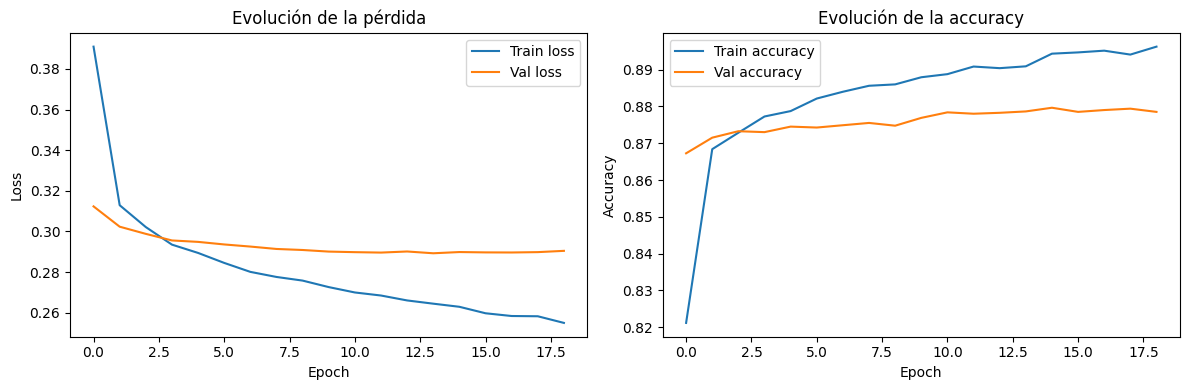

In [56]:
import matplotlib.pyplot as plt

# Curvas de entrenamiento
plt.figure(figsize=(12, 4))

# Loss
plt.subplot(1, 2, 1)
plt.plot(history_ann.history["loss"], label="Train loss")
plt.plot(history_ann.history["val_loss"], label="Val loss")
plt.title("Evolución de la pérdida")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()

# Accuracy
plt.subplot(1, 2, 2)
plt.plot(history_ann.history["accuracy"], label="Train accuracy")
plt.plot(history_ann.history["val_accuracy"], label="Val accuracy")
plt.title("Evolución de la accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()

plt.tight_layout()
plt.show()


**Conclusión**

El entrenamiento de la red neuronal multicapa (ANN) utilizando embeddings a nivel documento mostró un comportamiento estable y consistente a lo largo de las épocas. Desde las primeras iteraciones, la *accuracy* de validación se ubicó por encima del 86%, alcanzando valores cercanos al 88% a partir de la décima época y manteniéndose en ese rango hasta la activación del *early stopping*.

El análisis de las curvas de entrenamiento refuerza esta observación: la pérdida sobre el conjunto de entrenamiento disminuye de manera sostenida, mientras que la pérdida de validación desciende rápidamente y luego se estabiliza, sin evidenciar un sobreajuste marcado. En paralelo, la *accuracy* de entrenamiento continúa incrementándose gradualmente, mientras que la *accuracy* de validación permanece prácticamente constante, lo que justifica la detención temprana del entrenamiento como mecanismo de regularización.

La arquitectura utilizada corresponde a una red neuronal artificial multicapa (ANN) con una única capa densa oculta.  
Esta elección responde a un diseño deliberadamente simple, con el objetivo de evaluar el aporte del enfoque de Deep Learning sobre embeddings sin introducir complejidad innecesaria en la arquitectura.

De manera explícita, no se utilizaron arquitecturas más profundas (por ejemplo, múltiples capas densas adicionales) por dos motivos principales: **(1)** el objetivo de esta sección es comparativo y busca aislar el efecto de usar Keras/Deep Learning sobre los mismos embeddings, evitando que mejoras (o degradaciones) se deban a una arquitectura más compleja; y **(2)** aumentar la profundidad incrementa el número de parámetros y el riesgo de sobreajuste, especialmente cuando la señal ya está fuertemente resumida en embeddings de 100 dimensiones por documento, donde una red más profunda suele aportar ganancias marginales a costa de mayor costo computacional y mayor sensibilidad al ajuste de hiperparámetros.

Desde el punto de vista arquitectónico, el resumen del modelo (`model.summary()`) permite observar una red relativamente compacta, compuesta por una capa densa oculta de 128 neuronas y regularización mediante *Dropout*. Esta configuración resulta suficiente para capturar relaciones no lineales sobre la representación semántica contenida en los embeddings, manteniendo un número acotado de parámetros entrenables y un proceso de optimización controlado.

En términos de desempeño numérico, la ANN entrenada con Keras alcanza resultados comparables a los obtenidos previamente con el MLP entrenado mediante *scikit-learn* y con los modelos lineales aplicados sobre embeddings. Si bien la mejora en métricas globales como *accuracy* y *F1-score* es moderada, este enfoque aporta mayor flexibilidad y control sobre la arquitectura y el proceso de entrenamiento.

En conjunto, este bloque demuestra que una implementación de Deep Learning con Keras puede aprovechar eficazmente representaciones distribuidas como los embeddings, ofreciendo una alternativa robusta y extensible. No obstante, para este dataset en particular, los beneficios en desempeño frente a enfoques más simples resultan acotados, lo que refuerza la importancia de evaluar el equilibrio entre complejidad del modelo y ganancia real en performance.


## 9.5 – Evaluación del modelo ANN (Keras) sobre el conjunto test

En esta sección se evalúa el modelo de red neuronal multicapa entrenado con **tensorflow.keras** utilizando el conjunto de test, manteniendo el mismo criterio de evaluación aplicado en todos los modelos anteriores.

El objetivo de este bloque es medir el desempeño final del modelo ANN sobre datos no vistos, permitiendo una comparación directa y justa con:
- Modelos lineales entrenados sobre embeddings.
- El MLP entrenado con scikit-learn.

La evaluación se realiza mediante:
- Accuracy sobre el conjunto test.
- Classification report (precision, recall y F1-score).
- Matriz de confusión.

Este análisis permite determinar si el uso de un framework de Deep Learning aporta una mejora real en términos de desempeño o si su principal valor reside en la flexibilidad y el control del proceso de entrenamiento.


In [57]:
# =======================================
# 9.5 – Evaluación del modelo ANN (Keras)
# =======================================

import numpy as np
import pandas as pd
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Predicciones sobre el conjunto test
y_pred_ann_prob = model_ann.predict(X_test_ann_scaled)
y_pred_ann = (y_pred_ann_prob >= 0.5).astype(int).ravel()

# Accuracy
acc_ann = accuracy_score(y_test_ann, y_pred_ann)
print(f"Accuracy ANN (Keras + embeddings): {acc_ann:.4f}")

# Classification report
print("\nClassification Report – ANN (Keras + embeddings):")
print(classification_report(y_test_ann, y_pred_ann))

# Matriz de confusión
cm_ann = confusion_matrix(y_test_ann, y_pred_ann)

cm_ann_df = pd.DataFrame(
    cm_ann,
    index=["true_negative", "true_positive"],
    columns=["pred_negative", "pred_positive"]
)

cm_ann_df

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Accuracy ANN (Keras + embeddings): 0.8830

Classification Report – ANN (Keras + embeddings):
              precision    recall  f1-score   support

         0.0       0.89      0.88      0.88      5000
         1.0       0.88      0.89      0.88      5000

    accuracy                           0.88     10000
   macro avg       0.88      0.88      0.88     10000
weighted avg       0.88      0.88      0.88     10000



,pred_negative,pred_positive
true_negative,4400,600
true_positive,570,4430


**Conclusión**

El modelo ANN implementado con Keras sobre embeddings a nivel documento alcanza una **accuracy de 0.8830** en el conjunto test, un valor muy similar al observado durante el entrenamiento y la validación, lo que indica un comportamiento estable y sin signos claros de sobreajuste.

El classification report muestra un desempeño equilibrado entre ambas clases, con valores de precision, recall y F1-score cercanos a **0.88** tanto para reseñas negativas como positivas. Esto se refleja también en la matriz de confusión, donde los errores se distribuyen de forma relativamente simétrica entre falsos positivos y falsos negativos, sin un sesgo marcado hacia ninguna de las clases.

En términos comparativos, el modelo ANN logra una **mejora leve pero consistente** respecto a los modelos lineales entrenados sobre embeddings, y se encuentra en el mismo rango de desempeño que el MLP entrenado con scikit-learn. La ganancia en performance es moderada, pero el enfoque con Keras aporta mayor control sobre la arquitectura, el proceso de entrenamiento y el monitoreo de métricas, lo que resulta especialmente valioso desde una perspectiva de Deep Learning.

En conjunto, estos resultados confirman que el uso de redes neuronales densas sobre embeddings puede aportar una mejora incremental en esta tarea, aunque el beneficio principal no reside únicamente en la métrica final, sino en la flexibilidad y extensibilidad del enfoque para futuros modelos más complejos.


## 9.6 – Cierre de la Sección 9: Modelos de Deep Learning sobre embeddings

En esta sección se exploraron distintos enfoques de Deep Learning aplicados a embeddings a nivel documento, utilizando como base los vectores generados con Word2Vec.

El primer enfoque consistió en entrenar un MLP con scikit-learn sobre los embeddings normalizados. Este modelo mostró una mejora leve pero consistente respecto a la Regresión Logística, alcanzando métricas cercanas a 0.88 en accuracy y F1-score, con un entrenamiento estable y controlado mediante early stopping.

Posteriormente, se implementó una red neuronal densa (ANN) utilizando tensorflow.keras, reutilizando exactamente los mismos embeddings. Este modelo permitió definir explícitamente la arquitectura, incorporar regularización y analizar visualmente el proceso de entrenamiento. El desempeño final en test fue muy similar al del MLP, con una accuracy de 0.8830 y métricas balanceadas entre clases, sin evidencia de sobreajuste.

Al comparar los resultados obtenidos, se observa que los modelos de Deep Learning aportan una mejora incremental respecto a los enfoques lineales sobre embeddings, aunque la ganancia en performance es moderada. En este contexto, el principal valor del Deep Learning no radica únicamente en la métrica final, sino en la mayor flexibilidad del framework, el control del entrenamiento y la posibilidad de escalar hacia arquitecturas más complejas.

En conjunto, los resultados sugieren que, para este dataset y esta representación, los embeddings a nivel documento combinados con modelos relativamente simples ya capturan gran parte de la información relevante. El uso de redes neuronales se justifica más como una extensión natural del pipeline y como base para futuras mejoras, que como una solución estrictamente superior en términos de desempeño.


# 10 – Comparación global de enfoques

En esta sección se realiza una comparación integral de todos los modelos entrenados a lo largo del proyecto, abarcando desde enfoques clásicos de Machine Learning hasta modelos de Deep Learning aplicados sobre embeddings.

El objetivo no es únicamente identificar el modelo con mejor métrica, sino analizar los distintos enfoques en términos de:
- desempeño predictivo,
- complejidad del modelo,
- estabilidad del entrenamiento,
- costo computacional,
- e interpretabilidad.

Para garantizar una comparación justa, todos los modelos se evalúan sobre conjuntos de test equivalentes y utilizando las mismas métricas (accuracy, precision, recall y F1-score macro), evitando ajustes posteriores que puedan introducir sesgos.

Esta comparación permite responder de forma fundamentada qué tipo de enfoque resulta más adecuado para el problema de análisis de sentimiento planteado, y en qué escenarios podría justificarse el uso de modelos más complejos.


## 10.1 – Tabla comparativa final de modelos

In [61]:

# =======================================
# 10.1 – Tabla comparativa final de modelos
# (sin reentrenar; solo evaluación)
# =======================================

import numpy as np
import pandas as pd
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# -------------------------------
# Helper: unificar labels a 0/1
# -------------------------------
def to_binary(arr):
    arr = np.asarray(arr)

    # Caso strings / object: 'negative'/'positive'
    if arr.dtype.kind in {"U", "S", "O"}:
        mapping = {"negative": 0, "positive": 1}
        converted = np.vectorize(mapping.get)(arr)

        if np.any(pd.isna(converted)):
            raise ValueError(
                "Se encontraron labels no mapeadas. Esperado: 'negative'/'positive'. "
                f"Ejemplo de uniques: {np.unique(arr)[:10]}"
            )
        return converted.astype(int)

    # Caso numérico
    return arr.astype(int)

def metrics_row(model_name, y_true, y_pred):
    y_true_b = to_binary(y_true)
    y_pred_b = to_binary(y_pred)

    return {
        "Modelo": model_name,
        "Accuracy": accuracy_score(y_true_b, y_pred_b),
        "Precision (macro)": precision_score(y_true_b, y_pred_b, average="macro", zero_division=0),
        "Recall (macro)": recall_score(y_true_b, y_pred_b, average="macro", zero_division=0),
        "F1 (macro)": f1_score(y_true_b, y_pred_b, average="macro", zero_division=0),
    }

# -------------------------------
# Armar lista de modelos
# -------------------------------
rows = []

# ---- Modelos clásicos (ejemplos) ----
# Ajustá los nombres a los de tu notebook si cambian
rows.append(metrics_row("LogReg + BoW", y_test, y_pred_bow))
rows.append(metrics_row("LogReg + TF-IDF", y_test, y_pred))
rows.append(metrics_row("Random Forest + TF-IDF", y_test, y_pred_rf))

# ---- Embeddings (ya los tenés) ----
# (estos nombres aparecen en tu Sección 8)
rows.append(metrics_row("LogReg + Embeddings", y_test, y_pred_emb))
rows.append(metrics_row("LogReg + Embeddings + Scaler", y_test, y_pred_emb_scaled))

# ---- Deep Learning (Sección 9) ----
# MLP sklearn (Sección 9.2)
rows.append(metrics_row("MLP (sklearn) + Embeddings", y_test_mlp, y_pred_mlp))

# ANN Keras (Sección 9.5)
rows.append(metrics_row("ANN (Keras) + Embeddings", y_test_ann, y_pred_ann))

# -------------------------------
# DataFrame final
# -------------------------------
df_compare_all = (
    pd.DataFrame(rows)
    .sort_values(by="F1 (macro)", ascending=False)
    .reset_index(drop=True)
)

display(
    df_compare_all.style
    .format({
        "Accuracy": "{:.4f}",
        "Precision (macro)": "{:.4f}",
        "Recall (macro)": "{:.4f}",
        "F1 (macro)": "{:.4f}",
    })
    .set_caption("Comparación final de modelos (métricas macro y labels unificados)")
)

# df_compare_all


,Modelo,Accuracy,Precision (macro),Recall (macro),F1 (macro)
0,LogReg + BoW,0.8974,0.8975,0.8974,0.8974
1,LogReg + TF-IDF,0.8831,0.8831,0.8831,0.8831
2,MLP (sklearn) + Embeddings,0.8831,0.8831,0.8831,0.8831
3,ANN (Keras) + Embeddings,0.8830,0.8830,0.8830,0.8830
4,LogReg + Embeddings + Scaler,0.8749,0.8749,0.8749,0.8749
5,LogReg + Embeddings,0.8738,0.8738,0.8738,0.8738
6,Random Forest + TF-IDF,0.8618,0.8618,0.8618,0.8618


## 10.2 – Análisis comparativo de enfoques

La tabla comparativa permite analizar de forma directa el desempeño de los distintos enfoques utilizados a lo largo del proyecto, manteniendo métricas macro y etiquetas unificadas para garantizar una comparación justa.

En primer lugar, se observa que los **modelos clásicos basados en representaciones dispersas** continúan mostrando un desempeño muy competitivo. En particular, **Logistic Regression con Bag of Words** alcanza el mejor resultado global del experimento, con un F1 macro cercano a **0.897**, superando al resto de los enfoques evaluados. Esto confirma que, para el dataset IMDb, las señales léxicas explícitas siguen siendo altamente informativas para la tarea de análisis de sentimiento.

Los modelos basados en **TF-IDF**, tanto con regresión logística como con Random Forest, presentan resultados algo inferiores. Mientras que LogReg + TF-IDF mantiene un rendimiento sólido, el Random Forest evidencia una caída más marcada, lo que sugiere que este algoritmo no aprovecha de manera óptima las representaciones de alta dimensionalidad y sparsity propias del TF-IDF en este contexto.

Al pasar a los **modelos basados en embeddings**, se observa un comportamiento consistente entre enfoques. Tanto **LogReg sobre embeddings**, como su variante normalizada y los modelos neuronales (MLP con scikit-learn y ANN con Keras), convergen a valores de F1 macro en torno a **0.88**. Las diferencias entre ellos son marginales y no representan una mejora sustancial respecto a los modelos lineales.

En particular, el **MLP entrenado con scikit-learn** obtiene el mejor desempeño dentro del grupo de embeddings, seguido muy de cerca por la **ANN implementada con Keras**. Sin embargo, la ganancia frente a la regresión logística es mínima, lo que indica que la mayor capacidad no lineal de estos modelos no se traduce en una mejora significativa para este conjunto de datos y esta representación.

Desde una perspectiva práctica, estos resultados refuerzan un trade-off claro:

- Los **modelos clásicos** ofrecen mejor performance o resultados equivalentes con menor complejidad, mayor interpretabilidad y menor costo computacional.
- Los **modelos de Deep Learning sobre embeddings** aportan valor principalmente desde el punto de vista metodológico y exploratorio, pero no justifican su mayor complejidad en términos de desempeño final.

En síntesis, el análisis comparativo muestra que **el uso de Deep Learning no garantiza mejoras automáticas**, y que la elección del modelo debe considerar no solo la métrica final, sino también la simplicidad, estabilidad y costo del enfoque seleccionado.


# 11 – Conclusiones finales del proyecto

A lo largo del proyecto se exploraron distintos enfoques para la tarea de análisis de sentimiento sobre el dataset IMDb, evaluando tanto modelos clásicos de Machine Learning como modelos basados en Deep Learning, siempre bajo un esquema de comparación consistente y reproducible.

Uno de los principales hallazgos es que **los modelos lineales con representaciones léxicas simples siguen siendo extremadamente competitivos**. En particular, la combinación de **Logistic Regression + Bag of Words** obtuvo el mejor desempeño global, con un F1 macro cercano a 0.90, superando a modelos más complejos tanto en embeddings como en redes neuronales. Esto refuerza la idea de que, para este tipo de tarea, la información semántica explícita capturada por la frecuencia de términos sigue siendo altamente efectiva.

Los enfoques basados en **TF-IDF** mostraron un rendimiento sólido, aunque ligeramente inferior al Bag of Words. La regresión logística mantuvo un comportamiento estable, mientras que Random Forest evidenció mayores limitaciones frente a representaciones de alta dimensionalidad y sparsity.

En cuanto a los **embeddings Word2Vec a nivel documento**, se observó un rendimiento consistente entre distintos modelos. Tanto la regresión logística como los modelos neuronales (MLP con scikit-learn y ANN con Keras) convergieron a valores de F1 macro en torno a 0.88. Las diferencias entre estos enfoques fueron marginales, sin mejoras sustanciales al incrementar la complejidad del modelo.

El **MLP con scikit-learn** y la **ANN implementada con Keras** mostraron comportamientos muy similares, tanto en métricas finales como en estabilidad durante el entrenamiento. Si bien las redes neuronales lograron capturar relaciones no lineales, estas no se tradujeron en una mejora significativa frente a modelos lineales sobre los mismos embeddings.

Desde una perspectiva práctica y de negocio, el proyecto deja una conclusión clara:  
**mayor complejidad no implica necesariamente mejor performance**. En este contexto, los modelos más simples no solo ofrecen mejores o iguales resultados, sino que además presentan ventajas en términos de interpretabilidad, velocidad de entrenamiento y facilidad de mantenimiento.

En función de los resultados obtenidos, el enfoque recomendado para este problema sería **Logistic Regression con Bag of Words**, reservando los modelos de Deep Learning como herramientas exploratorias o como base para futuras extensiones más avanzadas.


Más allá de las métricas obtenidas, la elección de un modelo en un entorno real depende del tipo de texto, del dominio y de los requerimientos de producción. En contextos distintos al evaluado en este trabajo, como textos cortos o dominios específicos, enfoques basados en embeddings y modelos neuronales pueden resultar más adecuados.

# 12 – Líneas futuras de trabajo

Si bien el proyecto permitió explorar y comparar una amplia variedad de enfoques para el análisis de sentimiento, existen múltiples líneas de trabajo que podrían profundizar y extender los resultados obtenidos.

Una primera extensión natural sería el **ajuste fino de hiperparámetros**, especialmente en los modelos de Deep Learning. En este proyecto se priorizó la estabilidad y la comparabilidad entre modelos, utilizando configuraciones razonables pero no exhaustivas. Técnicas como grid search o random search sobre el número de capas, neuronas, tasas de dropout y learning rate podrían aportar mejoras marginales en performance.

Otra línea relevante consiste en el uso de **embeddings preentrenados externos**, como GloVe o FastText. Estos embeddings, entrenados sobre grandes corpus generales, podrían capturar relaciones semánticas más ricas que los embeddings entrenados únicamente sobre IMDb, especialmente para palabras menos frecuentes.

También resulta pertinente explorar **modelos secuenciales**, como redes LSTM o GRU, que operan directamente sobre secuencias de tokens. Este enfoque permitiría modelar el orden de las palabras, una información que se pierde al promediar embeddings a nivel documento. Si bien estos modelos no garantizan una mejora automática, su inclusión aportaría una perspectiva más completa del problema.

Como extensión de mayor complejidad, se podría incorporar el uso de **modelos basados en Transformers**, como BERT o DistilBERT, ya sea mediante fine-tuning completo o como generadores de embeddings contextualizados. Este tipo de modelos representa el estado del arte en NLP, aunque con un costo computacional significativamente mayor.

Finalmente, una línea de trabajo complementaria sería el **análisis de errores**, enfocándose en ejemplos mal clasificados para identificar patrones recurrentes (ironía, ambigüedad, reseñas mixtas). Este análisis cualitativo podría aportar insights valiosos para mejorar la representación de texto o definir estrategias híbridas.

En conjunto, estas extensiones permitirían escalar el proyecto desde un enfoque académico y comparativo hacia soluciones más avanzadas y cercanas a escenarios de producción.